___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://machinelearningmastery.com/wp-content/uploads/2016/03/Compare-Machine-Learning-Algorithms.png" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2022
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___


### <font color= #2E9AFE> Tema: Comparación de modelos de regresión</font>

Una vez que aprendimos a crear los modelos de machine learning ¿qué hacemos con ellos?

Comparar varios modelos de machine learning para problemas de regresión es necesario para poder encontrar cuál de todos los modelos es el más eficiente y tiene los resultados más precisos. 

Hay muchos criterios para comparar los modelos. 

Recordando que si la **variable de respuesta es continua** entonces, este es un problema de **regresión** y tenemos que usar modelos de regresión para estimar los valores predichos. 

Como vimos, hay muchos modelos de regresión candidatos. Nuestra tarea es encontrar el que sirva a nuestro propósito.

Vamos a comparar los siguientes modelos:
- Regresión lineal múltiple
- Regresión LASSO
- Regresión Ridge
- Árbol de decisión
- Bosques Aleatorios
- SVR
- Redes Neuronales

Vamos a utilizar varias métricas para comparar los modelos.

### Métricas de Performance (Regresión)

**Error Absoluto Medio (Mean Absolute Error - MAE)**

Si $y$ es la variable de respuesta y $\hat{y}$ es la predicción, entonces el MAE es el error entre estos pares ($y$,$\hat{y}$) de variables y se calcula de la forma:

$$MAE = \frac{\sum_{i=1}^{n}|y_{i}-\hat{y}_{i}|}{n}$$

*¿Qué hace?*
- Mide el promedio del error absoluto entre los valores reales y las predicciones

*Ventajas*
- Es una métrica independiente de la escala, lo que significa que está en las mismas unidades de las variables originales. 
- Fácil de interpretar
- Es buena opción si no nos importan los valores atípicos

*Desventajas*
- Se les da la misma importancia (peso) a todos los errores
- Es insensible a valores atípicos



**Error Cuadrático Medio (Mean Square Error - MSE)**


$$MSE = \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{n}$$

*¿Qué hace?*
El MSE calcula el promedio de los cuadrados del error entre los valores verdaderos y los valores estimados

*Ventajas*
- Función diferenciable
- El efecto de errores más grandes se vuelve más pronunciado que los errores más pequeños

*Desventajas*
- Tiene diferentes unidades que los valores reales


**Diferencia entre el MAE y el MSE**

La gran diferencia es cómo responden a errores más grandes. 

Depende mucho de la decisión del negocio y el costo asociado a los errores. 
     
 **R^2**
 
 $$R^{2}=1-\frac{SS_{res}}{SS_{Tot}}= \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{\sum_{i=1}^{n}(y_{i}-\bar{y}_{i})^{2}}$$
 
 *¿Qué hace?*
- Explica la proporción de la varianza de la salida ("Y") que puede ser explicada por los predictores ("X")

*Desventajas*
- Siempre incrementa añadiendo más variables independientes (X), lo cual es una desventaja porque esas variables pueden no ser importantes para el modelo

*Ventajas*
- Es una métrica relativa que se usa para comparar varios modelos que fueron entrenados con los mismos datos

     
     
 

### Los Datos

Tenemos un dataset de personas que tienen un carro y lo quieren vender. Se tienen las siguientes variables:

- Age 
- Gender
- Miles: promedio de millas manejadas por día
- Debt
- Income
- Sales

Basados en esas variables, queremos predecir el valor potencial de venta de un carro, por lo que variable a predecir es "Sales". 

In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Librerías

import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import seaborn as sns 
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD, Adam


In [3]:
#cargar datos
datos = pd.read_csv('carros.csv')
datos.head()

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


In [4]:
#Revisamos si hay datos nulos
missing = pd.DataFrame(datos.isnull().sum(),columns=['Valores_Nulos'])
missing

,Valores_Nulos
age,0
gender,0
miles,0
debt,0
income,0
sales,0


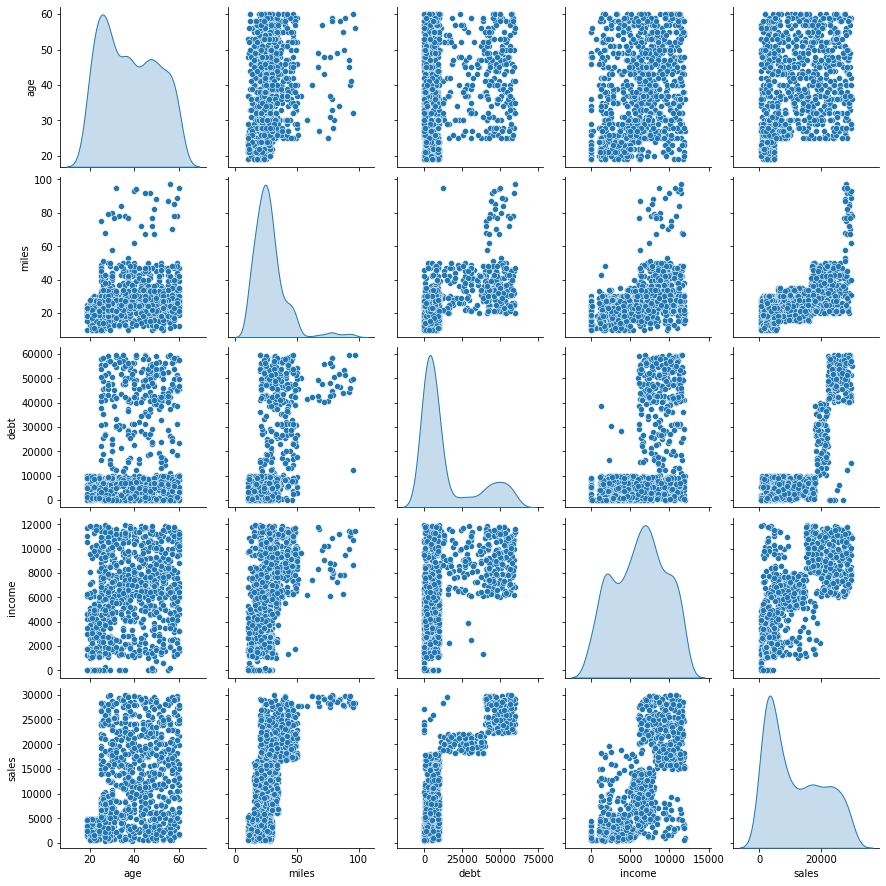

In [5]:
#Creamos gráficos básicos de los datos
sns.pairplot(datos[['age', 'miles', 'debt', 'income', 'sales']], diag_kind="kde")

In [6]:
#Calculando estadísticas básicas con los datos
datos_stats = datos.describe()
datos_stats = datos_stats.transpose()
datos_stats

,count,mean,std,min,25%,50%,75%,max
age,963.0,37.971963,12.290838,19.0,27.0,37.0,49.0,60.0
gender,963.0,0.512980,0.500091,0.0,0.0,1.0,1.0,1.0
miles,963.0,27.704050,13.378181,10.0,20.0,25.0,32.0,97.0
debt,963.0,14109.004154,18273.702481,0.0,1475.0,6236.0,16686.0,59770.0
income,963.0,6176.047767,3260.670142,0.0,3506.5,6360.0,8649.5,11970.0
sales,963.0,11689.860852,8986.896921,500.0,3554.0,9130.0,19245.0,29926.0


De las estadísticas anteriores podemos observar que algunas variables tienen grandes rangos y desviaciones, lo cual puede crear problemas durante el ajuste del modelo. Por lo tanto sería buena idea escalar los datos. 

### Train Test split

In [7]:
#separar la X y Y
X=datos.iloc[:,0:5]
y=datos.iloc[:,5]

#Dividimos los datos en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
#Estandarizar datos
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
y_train = preprocessing.scale(y_train)
X_test = preprocessing.scale(X_test)
y_test = preprocessing.scale(y_test)

**¿Porqué estandarizar los datos después del train test split?**

El escalamiento debe realizarse después de dividir los datos en entrenamiento y prueba, y se debe hacer sólo usando los datos de entrenamiento. 

Esto se debe a que los datos de prueba (test) tienen el papel de datos no vistos por el modelo, por lo que se supone que estos datos no están accesibles en la estapa del entrenamiento. 

Usar cualquier información proveniente de los datos de prueba antes o durante el entranamiento puede afectar al desempeño del modelo

#### Regresión Lineal 


In [9]:
#Inicializo objeto de regresión lineal
lin_reg = LinearRegression()
#Entrenar modelo
lin_reg.fit(X_train, y_train)
#Predecimos con datos de prueba
y_pred = lin_reg.predict(X_test)
#Métricas de performance
mae_lr = metrics.mean_absolute_error(y_test,y_pred)
mse_lr = metrics.mean_squared_error(y_test,y_pred)
r2_lr = metrics.r2_score(y_test,y_pred)


# Imprimir resultados
print('R2: ',r2_lr)
print('Mae: ',mae_lr)
print('Mse: ',mse_lr)
print('Rmse: ',np.sqrt(mse_lr))

R2:  0.8364108886819762
Mae:  0.31190078153453527
Mse:  0.1635891113180238
Rmse:  0.404461507832357


#### Regresión Lineal con selección de variables

In [10]:
rfe = RFE(lin_reg)
rfe = rfe.fit(X_train, y_train)
#Predecimos con datos de prueba
y_pred = rfe.predict (X_test)
#Métricas de performance
mae_rfe = metrics.mean_absolute_error(y_test, y_pred)
mse_rfe = metrics.mean_squared_error(y_test, y_pred)
r2_rfe = metrics.r2_score(y_test, y_pred)
# Imprimir resultados
print('R2: ',r2_lr)
print('Mae: ',mae_lr)
print('Mse: ',mse_lr)
print('Rmse: ',np.sqrt(mse_lr))

R2:  0.8364108886819762
Mae:  0.31190078153453527
Mse:  0.1635891113180238
Rmse:  0.404461507832357


#### Regresión Lineal con regularización Ridge


In [11]:
#Inicializo modelo de ridge con alpha = 1
ridge = Ridge(alpha=1)
#Entrenar modelo
ridge.fit(X_train,y_train)
#Predecir con datos de prueba
ridge_pred = ridge.predict(X_test)

#Métricas de performance
mae_ridge = metrics.mean_absolute_error(y_test, ridge_pred)
mse_ridge=metrics.mean_squared_error(y_test, ridge_pred)
r2_ridge = r2_score(y_test, ridge_pred)

# Imprimir resultados
print('R2:  ',r2_ridge)
print('MAE: ', mae_ridge)
print('MSE: ', mse_ridge)
print('RMSE:', np.sqrt(mse_ridge))

R2:   0.8364172531254731
MAE:  0.3119341315613786
MSE:  0.16358274687452687
RMSE: 0.4044536399570745


#### Bosques Aleatorios

In [12]:
#Inicializamos el bosque con 300 árboles
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X_train,y_train)

#Predecir el precio de venta  
y_pred = rf_regressor.predict(X_test)

#Calcular métricas
mae_rf=metrics.mean_absolute_error(y_test, y_pred)
mse_rf=metrics.mean_squared_error(y_test, y_pred)
r2_rf=metrics.r2_score(y_test, y_pred)

#Imprimir métricas
print('R2 square:',r2_rf)
print('MAE: ', mae_rf)
print('MSE: ', mse_rf)

R2 square: 0.9084579202821852
MAE:  0.21442115274283988
MSE:  0.09154207971781475


#### Máquina de Soporte Vectorial para Regresión (SVR)

In [13]:
#Inicializar objeto
regressor= SVR(kernel='rbf')
#Entrenar modelo
regressor.fit(X_train,y_train)
#Predecir
y_pred_svm=regressor.predict(X_test)

#Calcular métricas
mae_svr=metrics.mean_absolute_error(y_test, y_pred_svm)
mse_svr=metrics.mean_squared_error(y_test, y_pred_svm)
r2_svr=metrics.r2_score(y_test, y_pred_svm)

# Imprimir Métricas
print('R2 square:',r2_svr)
print('MAE: ', mae_svr)
print('MSE: ', mse_svr)

R2 square: 0.8939968531978244
MAE:  0.2368613686845288
MSE:  0.10600314680217558


#### Red Neuronal

In [14]:
#Hiperparámetros iniciales
epochs = 1000
learning_rate = 0.1
decay_rate = learning_rate/epochs
momentum = 0.8

# Crear arquitectura de la red neuronal
model = Sequential()
#5 variables de entrada, por lo tanto input_dim=5
model.add(Dense(12,activation='relu',input_dim=5))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='linear'))

# Configuración del optimizador
#gradiente descendente
opt = keras.optimizers.SGD(lr=learning_rate,momentum=momentum,
                           decay=decay_rate,nesterov=True)
#opt = keras.optimizers.Adam(lr=0.09)
model.compile(loss = 'mean_squared_error',
              optimizer=opt,
              metrics=['mae','mse'])

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
#Ajustar modelo
history = model.fit(X_train,y_train,
                    epochs=epochs,
                    batch_size=200,
                    validation_data=(X_test,y_test))

Epoch 1/1000
4/4 [==============================] - 2s 243ms/step - loss: 0.6018 - mae: 0.6605 - mse: 0.6018 - val_loss: 0.2472 - val_mae: 0.3857 - val_mse: 0.2472
Epoch 2/1000
4/4 [==============================] - 0s 34ms/step - loss: 0.2712 - mae: 0.3947 - mse: 0.2712 - val_loss: 0.1972 - val_mae: 0.3465 - val_mse: 0.1972
Epoch 3/1000
4/4 [==============================] - 0s 92ms/step - loss: 0.2052 - mae: 0.3528 - mse: 0.2052 - val_loss: 0.1925 - val_mae: 0.3389 - val_mse: 0.1925
Epoch 4/1000
4/4 [==============================] - 0s 45ms/step - loss: 0.2002 - mae: 0.3432 - mse: 0.2002 - val_loss: 0.1658 - val_mae: 0.3103 - val_mse: 0.1658
Epoch 5/1000
4/4 [==============================] - 0s 36ms/step - loss: 0.1854 - mae: 0.3226 - mse: 0.1854 - val_loss: 0.1782 - val_mae: 0.3324 - val_mse: 0.1782
Epoch 6/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.1969 - mae: 0.3420 - mse: 0.1969 - val_loss: 0.1887 - val_mae: 0.3345 - val_mse: 0.1887
Epoch 7/1000
4/4 [===

4/4 [==============================] - 0s 82ms/step - loss: 0.1262 - mae: 0.2563 - mse: 0.1262 - val_loss: 0.1155 - val_mae: 0.2632 - val_mse: 0.1155
Epoch 52/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.1271 - mae: 0.2593 - mse: 0.1271 - val_loss: 0.1300 - val_mae: 0.2657 - val_mse: 0.1300
Epoch 53/1000
4/4 [==============================] - 0s 35ms/step - loss: 0.1287 - mae: 0.2598 - mse: 0.1287 - val_loss: 0.1108 - val_mae: 0.2511 - val_mse: 0.1108
Epoch 54/1000
4/4 [==============================] - 0s 45ms/step - loss: 0.1244 - mae: 0.2542 - mse: 0.1244 - val_loss: 0.1101 - val_mae: 0.2535 - val_mse: 0.1101
Epoch 55/1000
4/4 [==============================] - 0s 46ms/step - loss: 0.1263 - mae: 0.2576 - mse: 0.1263 - val_loss: 0.1170 - val_mae: 0.2524 - val_mse: 0.1170
Epoch 56/1000
4/4 [==============================] - 0s 36ms/step - loss: 0.1282 - mae: 0.2593 - mse: 0.1282 - val_loss: 0.1167 - val_mae: 0.2525 - val_mse: 0.1167
Epoch 57/1000
4/4 [===========

4/4 [==============================] - 0s 42ms/step - loss: 0.1143 - mae: 0.2439 - mse: 0.1143 - val_loss: 0.1098 - val_mae: 0.2544 - val_mse: 0.1098
Epoch 102/1000
4/4 [==============================] - 0s 112ms/step - loss: 0.1174 - mae: 0.2482 - mse: 0.1174 - val_loss: 0.1288 - val_mae: 0.2587 - val_mse: 0.1288
Epoch 103/1000
4/4 [==============================] - 0s 62ms/step - loss: 0.1223 - mae: 0.2547 - mse: 0.1223 - val_loss: 0.1277 - val_mae: 0.2885 - val_mse: 0.1277
Epoch 104/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.1222 - mae: 0.2591 - mse: 0.1222 - val_loss: 0.1101 - val_mae: 0.2436 - val_mse: 0.1101
Epoch 105/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.1135 - mae: 0.2431 - mse: 0.1135 - val_loss: 0.1111 - val_mae: 0.2431 - val_mse: 0.1111
Epoch 106/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.1175 - mae: 0.2476 - mse: 0.1175 - val_loss: 0.1093 - val_mae: 0.2419 - val_mse: 0.1093
Epoch 107/1000
4/4 [====

Epoch 151/1000
4/4 [==============================] - 0s 34ms/step - loss: 0.1125 - mae: 0.2425 - mse: 0.1125 - val_loss: 0.1220 - val_mae: 0.2774 - val_mse: 0.1220
Epoch 152/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.1169 - mae: 0.2517 - mse: 0.1169 - val_loss: 0.1114 - val_mae: 0.2430 - val_mse: 0.1114
Epoch 153/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.1116 - mae: 0.2403 - mse: 0.1116 - val_loss: 0.1143 - val_mae: 0.2609 - val_mse: 0.1143
Epoch 154/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.1113 - mae: 0.2432 - mse: 0.1113 - val_loss: 0.1333 - val_mae: 0.2628 - val_mse: 0.1333
Epoch 155/1000
4/4 [==============================] - 0s 32ms/step - loss: 0.1141 - mae: 0.2468 - mse: 0.1141 - val_loss: 0.1114 - val_mae: 0.2423 - val_mse: 0.1114
Epoch 156/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.1135 - mae: 0.2396 - mse: 0.1135 - val_loss: 0.1101 - val_mae: 0.2502 - val_mse: 0.1101
Epoch 157/

Epoch 201/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.1076 - mae: 0.2382 - mse: 0.1076 - val_loss: 0.1166 - val_mae: 0.2528 - val_mse: 0.1166
Epoch 202/1000
4/4 [==============================] - 0s 46ms/step - loss: 0.1081 - mae: 0.2387 - mse: 0.1081 - val_loss: 0.1136 - val_mae: 0.2570 - val_mse: 0.1136
Epoch 203/1000
4/4 [==============================] - 0s 45ms/step - loss: 0.1110 - mae: 0.2412 - mse: 0.1110 - val_loss: 0.1170 - val_mae: 0.2618 - val_mse: 0.1170
Epoch 204/1000
4/4 [==============================] - 0s 50ms/step - loss: 0.1090 - mae: 0.2376 - mse: 0.1090 - val_loss: 0.1287 - val_mae: 0.2558 - val_mse: 0.1287
Epoch 205/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.1086 - mae: 0.2389 - mse: 0.1086 - val_loss: 0.1185 - val_mae: 0.2468 - val_mse: 0.1185
Epoch 206/1000
4/4 [==============================] - 0s 32ms/step - loss: 0.1075 - mae: 0.2349 - mse: 0.1075 - val_loss: 0.1123 - val_mae: 0.2452 - val_mse: 0.1123
Epoch 207/

Epoch 251/1000
4/4 [==============================] - 0s 63ms/step - loss: 0.1072 - mae: 0.2360 - mse: 0.1072 - val_loss: 0.1178 - val_mae: 0.2607 - val_mse: 0.1178
Epoch 252/1000
4/4 [==============================] - 0s 68ms/step - loss: 0.1065 - mae: 0.2359 - mse: 0.1065 - val_loss: 0.1144 - val_mae: 0.2542 - val_mse: 0.1144
Epoch 253/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.1122 - mae: 0.2437 - mse: 0.1122 - val_loss: 0.1252 - val_mae: 0.2789 - val_mse: 0.1252
Epoch 254/1000
4/4 [==============================] - 0s 53ms/step - loss: 0.1205 - mae: 0.2608 - mse: 0.1205 - val_loss: 0.1172 - val_mae: 0.2497 - val_mse: 0.1172
Epoch 255/1000
4/4 [==============================] - 0s 39ms/step - loss: 0.1054 - mae: 0.2346 - mse: 0.1054 - val_loss: 0.1262 - val_mae: 0.2710 - val_mse: 0.1262
Epoch 256/1000
4/4 [==============================] - 0s 54ms/step - loss: 0.1075 - mae: 0.2383 - mse: 0.1075 - val_loss: 0.1219 - val_mae: 0.2688 - val_mse: 0.1219
Epoch 257/

Epoch 301/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.1134 - mae: 0.2461 - mse: 0.1134 - val_loss: 0.1414 - val_mae: 0.3035 - val_mse: 0.1414
Epoch 302/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.1165 - mae: 0.2508 - mse: 0.1165 - val_loss: 0.1265 - val_mae: 0.2814 - val_mse: 0.1265
Epoch 303/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.1102 - mae: 0.2453 - mse: 0.1102 - val_loss: 0.1213 - val_mae: 0.2695 - val_mse: 0.1213
Epoch 304/1000
4/4 [==============================] - 0s 32ms/step - loss: 0.1058 - mae: 0.2351 - mse: 0.1058 - val_loss: 0.1191 - val_mae: 0.2513 - val_mse: 0.1191
Epoch 305/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.1027 - mae: 0.2311 - mse: 0.1027 - val_loss: 0.1233 - val_mae: 0.2570 - val_mse: 0.1233
Epoch 306/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.1031 - mae: 0.2298 - mse: 0.1031 - val_loss: 0.1240 - val_mae: 0.2762 - val_mse: 0.1240
Epoch 307/

Epoch 351/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.1101 - mae: 0.2470 - mse: 0.1101 - val_loss: 0.1227 - val_mae: 0.2701 - val_mse: 0.1227
Epoch 352/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.1057 - mae: 0.2380 - mse: 0.1057 - val_loss: 0.1404 - val_mae: 0.2689 - val_mse: 0.1404
Epoch 353/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.1100 - mae: 0.2430 - mse: 0.1100 - val_loss: 0.1266 - val_mae: 0.2693 - val_mse: 0.1266
Epoch 354/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.1040 - mae: 0.2335 - mse: 0.1040 - val_loss: 0.1249 - val_mae: 0.2586 - val_mse: 0.1249
Epoch 355/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.1052 - mae: 0.2330 - mse: 0.1052 - val_loss: 0.1257 - val_mae: 0.2548 - val_mse: 0.1257
Epoch 356/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.1037 - mae: 0.2321 - mse: 0.1037 - val_loss: 0.1232 - val_mae: 0.2683 - val_mse: 0.1232
Epoch 357/

Epoch 401/1000
4/4 [==============================] - 0s 32ms/step - loss: 0.1043 - mae: 0.2318 - mse: 0.1043 - val_loss: 0.1310 - val_mae: 0.2630 - val_mse: 0.1310
Epoch 402/1000
4/4 [==============================] - 0s 32ms/step - loss: 0.1022 - mae: 0.2300 - mse: 0.1022 - val_loss: 0.1358 - val_mae: 0.2650 - val_mse: 0.1358
Epoch 403/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.1058 - mae: 0.2351 - mse: 0.1058 - val_loss: 0.1193 - val_mae: 0.2615 - val_mse: 0.1193
Epoch 404/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.0994 - mae: 0.2260 - mse: 0.0994 - val_loss: 0.1282 - val_mae: 0.2712 - val_mse: 0.1282
Epoch 405/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.1008 - mae: 0.2285 - mse: 0.1008 - val_loss: 0.1275 - val_mae: 0.2730 - val_mse: 0.1275
Epoch 406/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.1031 - mae: 0.2345 - mse: 0.1031 - val_loss: 0.1395 - val_mae: 0.2709 - val_mse: 0.1395
Epoch 407/

Epoch 451/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.1032 - mae: 0.2289 - mse: 0.1032 - val_loss: 0.1468 - val_mae: 0.3148 - val_mse: 0.1468
Epoch 452/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.1111 - mae: 0.2457 - mse: 0.1111 - val_loss: 0.1392 - val_mae: 0.2688 - val_mse: 0.1392
Epoch 453/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.1062 - mae: 0.2338 - mse: 0.1062 - val_loss: 0.1266 - val_mae: 0.2642 - val_mse: 0.1266
Epoch 454/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.1036 - mae: 0.2336 - mse: 0.1036 - val_loss: 0.1259 - val_mae: 0.2562 - val_mse: 0.1259
Epoch 455/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0981 - mae: 0.2236 - mse: 0.0981 - val_loss: 0.1206 - val_mae: 0.2628 - val_mse: 0.1206
Epoch 456/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.1008 - mae: 0.2259 - mse: 0.1008 - val_loss: 0.1406 - val_mae: 0.3014 - val_mse: 0.1406
Epoch 457/

Epoch 501/1000
4/4 [==============================] - 0s 86ms/step - loss: 0.0973 - mae: 0.2229 - mse: 0.0973 - val_loss: 0.1293 - val_mae: 0.2612 - val_mse: 0.1293
Epoch 502/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.0984 - mae: 0.2244 - mse: 0.0984 - val_loss: 0.1315 - val_mae: 0.2613 - val_mse: 0.1315
Epoch 503/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0987 - mae: 0.2264 - mse: 0.0987 - val_loss: 0.1281 - val_mae: 0.2620 - val_mse: 0.1281
Epoch 504/1000
4/4 [==============================] - 0s 40ms/step - loss: 0.0985 - mae: 0.2250 - mse: 0.0985 - val_loss: 0.1360 - val_mae: 0.2685 - val_mse: 0.1360
Epoch 505/1000
4/4 [==============================] - 0s 45ms/step - loss: 0.1008 - mae: 0.2282 - mse: 0.1008 - val_loss: 0.1286 - val_mae: 0.2800 - val_mse: 0.1286
Epoch 506/1000
4/4 [==============================] - 0s 53ms/step - loss: 0.1065 - mae: 0.2399 - mse: 0.1065 - val_loss: 0.1395 - val_mae: 0.2702 - val_mse: 0.1395
Epoch 507/

Epoch 551/1000
4/4 [==============================] - 0s 40ms/step - loss: 0.0984 - mae: 0.2268 - mse: 0.0984 - val_loss: 0.1270 - val_mae: 0.2726 - val_mse: 0.1270
Epoch 552/1000
4/4 [==============================] - 0s 36ms/step - loss: 0.0973 - mae: 0.2262 - mse: 0.0973 - val_loss: 0.1258 - val_mae: 0.2675 - val_mse: 0.1258
Epoch 553/1000
4/4 [==============================] - 0s 30ms/step - loss: 0.1018 - mae: 0.2336 - mse: 0.1018 - val_loss: 0.1360 - val_mae: 0.2667 - val_mse: 0.1360
Epoch 554/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0985 - mae: 0.2271 - mse: 0.0985 - val_loss: 0.1254 - val_mae: 0.2697 - val_mse: 0.1254
Epoch 555/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0959 - mae: 0.2252 - mse: 0.0959 - val_loss: 0.1266 - val_mae: 0.2574 - val_mse: 0.1266
Epoch 556/1000
4/4 [==============================] - 0s 30ms/step - loss: 0.0954 - mae: 0.2219 - mse: 0.0954 - val_loss: 0.1535 - val_mae: 0.2811 - val_mse: 0.1535
Epoch 557/

Epoch 601/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0956 - mae: 0.2218 - mse: 0.0956 - val_loss: 0.1291 - val_mae: 0.2754 - val_mse: 0.1291
Epoch 602/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0998 - mae: 0.2299 - mse: 0.0998 - val_loss: 0.1408 - val_mae: 0.2716 - val_mse: 0.1408
Epoch 603/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0981 - mae: 0.2250 - mse: 0.0981 - val_loss: 0.1432 - val_mae: 0.2770 - val_mse: 0.1432
Epoch 604/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.0976 - mae: 0.2302 - mse: 0.0976 - val_loss: 0.1259 - val_mae: 0.2653 - val_mse: 0.1259
Epoch 605/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0957 - mae: 0.2246 - mse: 0.0957 - val_loss: 0.1279 - val_mae: 0.2646 - val_mse: 0.1279
Epoch 606/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0946 - mae: 0.2222 - mse: 0.0946 - val_loss: 0.1262 - val_mae: 0.2604 - val_mse: 0.1262
Epoch 607/

Epoch 651/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0947 - mae: 0.2214 - mse: 0.0947 - val_loss: 0.1261 - val_mae: 0.2714 - val_mse: 0.1261
Epoch 652/1000
4/4 [==============================] - 0s 33ms/step - loss: 0.0959 - mae: 0.2275 - mse: 0.0959 - val_loss: 0.1380 - val_mae: 0.2743 - val_mse: 0.1380
Epoch 653/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0950 - mae: 0.2232 - mse: 0.0950 - val_loss: 0.1419 - val_mae: 0.2741 - val_mse: 0.1419
Epoch 654/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0990 - mae: 0.2288 - mse: 0.0990 - val_loss: 0.1247 - val_mae: 0.2700 - val_mse: 0.1247
Epoch 655/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0946 - mae: 0.2248 - mse: 0.0946 - val_loss: 0.1304 - val_mae: 0.2639 - val_mse: 0.1304
Epoch 656/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0946 - mae: 0.2221 - mse: 0.0946 - val_loss: 0.1270 - val_mae: 0.2697 - val_mse: 0.1270
Epoch 657/

Epoch 701/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1148 - mae: 0.2477 - mse: 0.1148 - val_loss: 0.1288 - val_mae: 0.2643 - val_mse: 0.1288
Epoch 702/1000
4/4 [==============================] - 0s 32ms/step - loss: 0.0942 - mae: 0.2216 - mse: 0.0942 - val_loss: 0.1285 - val_mae: 0.2608 - val_mse: 0.1285
Epoch 703/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0953 - mae: 0.2233 - mse: 0.0953 - val_loss: 0.1255 - val_mae: 0.2656 - val_mse: 0.1255
Epoch 704/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0932 - mae: 0.2216 - mse: 0.0932 - val_loss: 0.1356 - val_mae: 0.2670 - val_mse: 0.1356
Epoch 705/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0944 - mae: 0.2216 - mse: 0.0944 - val_loss: 0.1245 - val_mae: 0.2609 - val_mse: 0.1245
Epoch 706/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0954 - mae: 0.2228 - mse: 0.0954 - val_loss: 0.1360 - val_mae: 0.2644 - val_mse: 0.1360
Epoch 707/

Epoch 751/1000
4/4 [==============================] - 0s 30ms/step - loss: 0.0929 - mae: 0.2205 - mse: 0.0929 - val_loss: 0.1485 - val_mae: 0.2776 - val_mse: 0.1485
Epoch 752/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.0999 - mae: 0.2312 - mse: 0.0999 - val_loss: 0.1272 - val_mae: 0.2638 - val_mse: 0.1272
Epoch 753/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.0935 - mae: 0.2219 - mse: 0.0935 - val_loss: 0.1258 - val_mae: 0.2663 - val_mse: 0.1258
Epoch 754/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0934 - mae: 0.2198 - mse: 0.0934 - val_loss: 0.1248 - val_mae: 0.2663 - val_mse: 0.1248
Epoch 755/1000
4/4 [==============================] - 0s 30ms/step - loss: 0.0952 - mae: 0.2222 - mse: 0.0952 - val_loss: 0.1254 - val_mae: 0.2643 - val_mse: 0.1254
Epoch 756/1000
4/4 [==============================] - 0s 32ms/step - loss: 0.0936 - mae: 0.2198 - mse: 0.0936 - val_loss: 0.1313 - val_mae: 0.2701 - val_mse: 0.1313
Epoch 757/

Epoch 801/1000
4/4 [==============================] - 0s 32ms/step - loss: 0.0933 - mae: 0.2225 - mse: 0.0933 - val_loss: 0.1261 - val_mae: 0.2659 - val_mse: 0.1261
Epoch 802/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.0924 - mae: 0.2193 - mse: 0.0924 - val_loss: 0.1303 - val_mae: 0.2639 - val_mse: 0.1303
Epoch 803/1000
4/4 [==============================] - 0s 54ms/step - loss: 0.0930 - mae: 0.2194 - mse: 0.0930 - val_loss: 0.1374 - val_mae: 0.2728 - val_mse: 0.1374
Epoch 804/1000
4/4 [==============================] - 0s 46ms/step - loss: 0.0946 - mae: 0.2199 - mse: 0.0946 - val_loss: 0.1267 - val_mae: 0.2613 - val_mse: 0.1267
Epoch 805/1000
4/4 [==============================] - 0s 59ms/step - loss: 0.0905 - mae: 0.2154 - mse: 0.0905 - val_loss: 0.1263 - val_mae: 0.2706 - val_mse: 0.1263
Epoch 806/1000
4/4 [==============================] - 0s 48ms/step - loss: 0.1004 - mae: 0.2304 - mse: 0.1004 - val_loss: 0.1402 - val_mae: 0.2849 - val_mse: 0.1402
Epoch 807/

Epoch 851/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0968 - mae: 0.2251 - mse: 0.0968 - val_loss: 0.1298 - val_mae: 0.2695 - val_mse: 0.1298
Epoch 852/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0915 - mae: 0.2187 - mse: 0.0915 - val_loss: 0.1300 - val_mae: 0.2669 - val_mse: 0.1300
Epoch 853/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.0923 - mae: 0.2169 - mse: 0.0923 - val_loss: 0.1332 - val_mae: 0.2658 - val_mse: 0.1332
Epoch 854/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0919 - mae: 0.2163 - mse: 0.0919 - val_loss: 0.1305 - val_mae: 0.2695 - val_mse: 0.1305
Epoch 855/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0967 - mae: 0.2253 - mse: 0.0967 - val_loss: 0.1296 - val_mae: 0.2704 - val_mse: 0.1296
Epoch 856/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0914 - mae: 0.2171 - mse: 0.0914 - val_loss: 0.1309 - val_mae: 0.2754 - val_mse: 0.1309
Epoch 857/

Epoch 901/1000
4/4 [==============================] - 0s 39ms/step - loss: 0.0940 - mae: 0.2239 - mse: 0.0940 - val_loss: 0.1339 - val_mae: 0.2660 - val_mse: 0.1339
Epoch 902/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.0931 - mae: 0.2180 - mse: 0.0931 - val_loss: 0.1378 - val_mae: 0.2796 - val_mse: 0.1378
Epoch 903/1000
4/4 [==============================] - 0s 33ms/step - loss: 0.0972 - mae: 0.2295 - mse: 0.0972 - val_loss: 0.1320 - val_mae: 0.2681 - val_mse: 0.1320
Epoch 904/1000
4/4 [==============================] - 0s 40ms/step - loss: 0.0917 - mae: 0.2173 - mse: 0.0917 - val_loss: 0.1305 - val_mae: 0.2721 - val_mse: 0.1305
Epoch 905/1000
4/4 [==============================] - 0s 50ms/step - loss: 0.0931 - mae: 0.2221 - mse: 0.0931 - val_loss: 0.1279 - val_mae: 0.2654 - val_mse: 0.1279
Epoch 906/1000
4/4 [==============================] - 0s 36ms/step - loss: 0.0931 - mae: 0.2216 - mse: 0.0931 - val_loss: 0.1497 - val_mae: 0.2818 - val_mse: 0.1497
Epoch 907/

Epoch 951/1000
4/4 [==============================] - 0s 47ms/step - loss: 0.0912 - mae: 0.2170 - mse: 0.0912 - val_loss: 0.1305 - val_mae: 0.2766 - val_mse: 0.1305
Epoch 952/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.0958 - mae: 0.2254 - mse: 0.0958 - val_loss: 0.1342 - val_mae: 0.2690 - val_mse: 0.1342
Epoch 953/1000
4/4 [==============================] - 0s 35ms/step - loss: 0.0898 - mae: 0.2146 - mse: 0.0898 - val_loss: 0.1291 - val_mae: 0.2659 - val_mse: 0.1291
Epoch 954/1000
4/4 [==============================] - 0s 52ms/step - loss: 0.0916 - mae: 0.2183 - mse: 0.0916 - val_loss: 0.1308 - val_mae: 0.2645 - val_mse: 0.1308
Epoch 955/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.0921 - mae: 0.2196 - mse: 0.0921 - val_loss: 0.1560 - val_mae: 0.2883 - val_mse: 0.1560
Epoch 956/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.0964 - mae: 0.2257 - mse: 0.0964 - val_loss: 0.1309 - val_mae: 0.2683 - val_mse: 0.1309
Epoch 957/

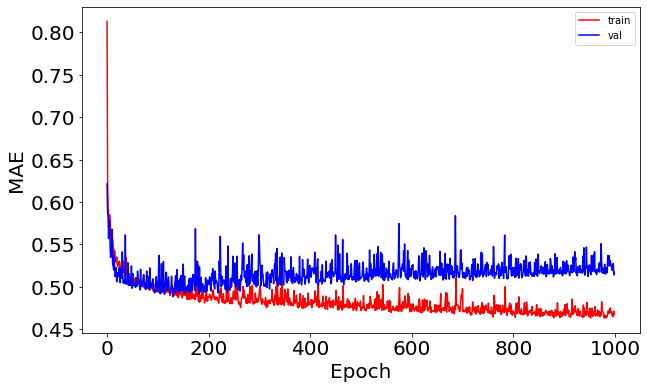

In [16]:
#Graficar el MAE
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['mae']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_mae']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MAE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

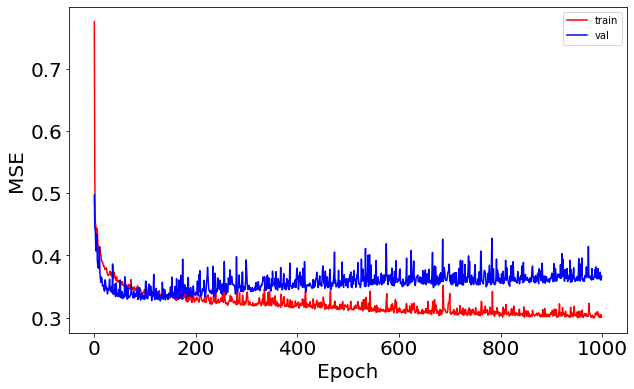

In [17]:
#Graficar el MSE
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

Con los gráficos de arriba podemos observar que tanto las métricas de train y de validación disminuyen exponencialmentes con el incremento del número de épocas. 

10/10 [==============================] - 0s 4ms/step


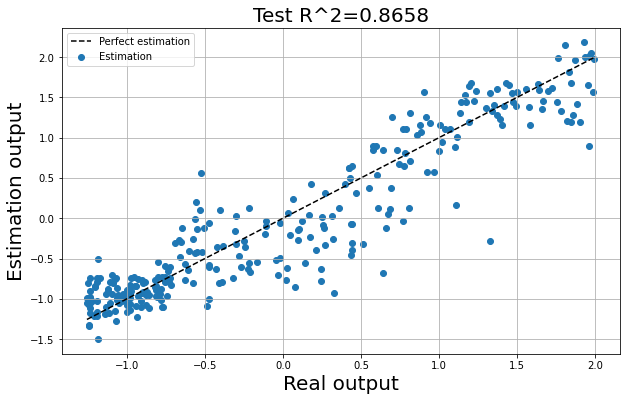

In [18]:
#Predecir
yhat = model.predict(X_test)

#Calcular R2
R2_score = r2_score(y_test,yhat)

#Graficar la R2
xmin,xmax = min(y_test),max(y_test)
xline = np.linspace(xmin,xmax)
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,yhat,label='Estimation')
plt.plot(xline,xline,'k--',label='Perfect estimation')
plt.xlabel('Real output', fontsize=20)
plt.ylabel('Estimation output', fontsize=20)
plt.title('Test R^2=%0.4f'%R2_score, fontsize=20)
plt.legend()
plt.grid()
plt.show()

In [19]:
#Calcular métricas
mae_nn=metrics.mean_absolute_error(y_test, yhat)
mse_nn=metrics.mean_squared_error(y_test, yhat)
r2_nn=metrics.r2_score(y_test, yhat)

# imprimir Métricas
print('R2 square:',r2_nn)
print('MAE: ', mae_nn)
print('MSE: ', mse_nn)

R2 square: 0.8658145200224845
MAE:  0.26724309950318287
MSE:  0.1341854799775155


#### Resultados con train test split

In [20]:
data_compar_train_test = {'Modelo': ['LR', 'LR RFE', 'Ridge', 'RF', ' SVR', 'NN'], 'R2': [r2_lr, r2_rfe, r2_ridge, r2_rf, r2_svr, r2_nn], 'MSE': [mse_lr, mse_rfe, mse_ridge, mse_rf, mse_svr, mse_nn], 'MAE': [mae_lr, mae_rfe, mae_ridge,mae_rf,mae_svr, mae_nn]} 
data_compar_train_test = pd.DataFrame(data_compar_train_test)
data_compar_train_test

,Modelo,R2,MSE,MAE
0,LR,0.836411,0.163589,0.311901
1,LR RFE,0.798899,0.201101,0.334848
2,Ridge,0.836417,0.163583,0.311934
3,RF,0.908458,0.091542,0.214421
4,SVR,0.893997,0.106003,0.236861
5,NN,0.865815,0.134185,0.267243


### Cross Validation con optimización de hiperparámetros

La idea es dividir los datos en train y test, entrenar múltiples modelos muestreando los datos de entrenamiento. 
Finalmente probar el modelo en el test set



<img style="float: center; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/700/1*4G__SV580CxFj78o9yUXuQ.png" width="450px" height="280px" />


In [21]:
#Configurar los folds que vamos a usar para todos los modelos
n_folds = 5
seed = 7
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=n_folds, random_state=seed, shuffle=True)

#### Regresión Lineal

In [22]:
#Inicializar modelo
lm=LinearRegression()

#Hacer el cross validation y probar con el train
r2_lr= (cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_lr= -(cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_lr= (-cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_lr)
print("MAE Train", mae_lr)
print("MSE Train", mse_lr)

R2 train 0.8158013380172221
MAE Train 0.3258039481837593
MSE Train 0.181585415606085


In [23]:
#Performance en el test
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

mae_lr=metrics.mean_absolute_error(y_test,y_pred)
mse_lr=metrics.mean_squared_error(y_test,y_pred)
r2_lr=metrics.r2_score(y_test,y_pred)

results_lr = pd.DataFrame([['Linear regression', mae_lr,mse_lr,r2_lr]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_lr


,Model,MAE,MSE,R2
0,Linear regression,0.311901,0.163589,0.836411


#### Regresión lineal con selección de variables (RFE)

In [24]:
# Hacer el grid search
#Especificar el modelo
lm = LinearRegression()
#Ajustar datos
lm.fit(X_train, y_train)
#Inicializar modelo de Recursive Feature Elimination para selección de variables
rfe = RFE(lm)             

#Especificar rango de hiperparámetros a tunear
hyper_params = [{'n_features_to_select': list(range(1, np.shape(X_train)[1]+1))}]

# Crear el grid search
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = kfold, 
                        verbose = 1,
                        return_train_score=True)      


#Performance en el test
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)

mae_rfe=metrics.mean_absolute_error(y_test,y_pred)
mse_rfe=metrics.mean_squared_error(y_test,y_pred)
r2_rfe=metrics.r2_score(y_test,y_pred)

results_rfe = pd.DataFrame([['Linear regression RFE', mae_rfe,mse_rfe,r2_rfe]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_rfe

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,Model,MAE,MSE,R2
0,Linear regression RFE,0.31151,0.163283,0.836717


#### Rigde

In [25]:
from sklearn.linear_model import RidgeCV
#Inicializar modelo de Ridge con cross validation para seleccionar el hiperparámetro de alpha óptimo
model = RidgeCV(alphas=np.arange(0.01,5,0.01), cv=kfold, scoring='neg_mean_squared_error') 
#Entreno modelo
model.fit(X_train, y_train)

#Alfa óptima
print('alfa: %f' % model.alpha_)

#Performance en el test
y_pred = model.predict(X_test)

mae_ridge=metrics.mean_absolute_error(y_test,y_pred)
mse_ridge=metrics.mean_squared_error(y_test,y_pred)
r2_ridge=metrics.r2_score(y_test,y_pred)

results_ridge = pd.DataFrame([['Linear regression Ridge', mae_ridge,mse_ridge,r2_ridge]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_ridge

alfa: 4.240000


,Model,MAE,MSE,R2
0,Linear regression Ridge,0.312042,0.163572,0.836428


#### Random Forest



In [26]:
from sklearn.ensemble import RandomForestRegressor

#Usando cross validation y grid search
from sklearn.model_selection import GridSearchCV
#Inicializo modelo
model = RandomForestRegressor(min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
#Grid search para optimizar hiperparámetros
gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11), #profundidad del árbol
                                'min_samples_split': range(10, 60, 10),
                                'n_estimators': [100, 300, 500, 800], #número de árboles
                                'criterion': ['mse']}, 
                  cv=kfold,
                  scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

print(gs.best_params_)

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

{'criterion': 'mse', 'max_depth': 8, 'min_samples_split': 30, 'n_estimators': 800}


In [27]:
#crear modelo usando parámetros óptimos
new_model_RF = RandomForestRegressor(n_estimators=800,
                               criterion='mse',
                               max_depth=8,
                               min_samples_split=30,
                               min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
#Entreno modelo optimizado
new_model_RF.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_rf= (cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_rf= -(cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_rf= (-cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_rf)
print("MAE Train", mae_rf)
print("MSE Train", mse_rf)

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning:

R2 train 0.8920603214443167
MAE Train 0.21984381446970488
MSE Train 0.10667653653789569


In [28]:
#Performance en el test
y_pred = new_model_RF.predict(X_test)

mae_rf=metrics.mean_absolute_error(y_test,y_pred)
mse_rf=metrics.mean_squared_error(y_test,y_pred)
r2_rf=metrics.r2_score(y_test,y_pred)

results_rf = pd.DataFrame([['Random Forest', mae_rf,mse_rf,r2_rf]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_rf

,Model,MAE,MSE,R2
0,Random Forest,0.208829,0.085517,0.914483


#### Árbol de decisión

In [29]:
#Usando cross validation y grid search
tree = DecisionTreeRegressor()

#Grid search para optimizar hiperparámetros
gs = GridSearchCV(tree,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=kfold,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'max_depth': 7, 'min_samples_split': 50}


In [30]:
#crear modelo usando parámetros óptimos
new_model_tree = DecisionTreeRegressor(max_depth=7,
                                  min_samples_split=50)

#Entreno modelo optimizado
new_model_tree.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_tree= (cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_tree= -(cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_tree= (-cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_tree)
print("MAE Train", mae_tree)
print("MSE Train", mse_tree)

R2 train 0.8833332245009938
MAE Train 0.22517186175054055
MSE Train 0.11514499443663606


In [31]:
#Performance en el test
y_pred = new_model_tree.predict(X_test)

mae_tree=metrics.mean_absolute_error(y_test,y_pred)
mse_tree=metrics.mean_squared_error(y_test,y_pred)
r2_tree=metrics.r2_score(y_test,y_pred)

results_tree = pd.DataFrame([['Decision Tree', mae_tree,mse_tree,r2_tree]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_tree 

,Model,MAE,MSE,R2
0,Decision Tree,0.2231,0.108104,0.891896


#### Máquina de vector soporte (SVR)

In [32]:
#proponer malla para el gridsearch
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

model = SVR()

gs = GridSearchCV(model,
                  tuned_parameters, 
                  cv=kfold,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [33]:
#crear modelo usando parámetros óptimos
new_model_svr = SVR(kernel='rbf', C=1000, gamma=0.001)

#Entreno modelo optimizado
new_model_svr.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_svr= (cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_svr= -(cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_svr= (-cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_svr)
print("MAE Train", mae_svr)
print("MSE Train", mse_svr)

R2 train 0.8833332245009938
MAE Train 0.22517186175054055
MSE Train 0.11514499443663606


In [34]:
#Performance en el test
y_pred = new_model_svr.predict(X_test)

mae_svr=metrics.mean_absolute_error(y_test,y_pred)
mse_svr=metrics.mean_squared_error(y_test,y_pred)
r2_svr=metrics.r2_score(y_test,y_pred)

results_svr = pd.DataFrame([['SVR', mae_svr,mse_svr,r2_svr]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_svr 

,Model,MAE,MSE,R2
0,SVR,0.257272,0.118553,0.881447


#### Red Neuronal

In [35]:
def create_model(lr=0.1,momentum=0.8):
    # Neural network architecture
    model = Sequential()
    model.add(Dense(12,activation='relu',input_dim=5))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='linear'))
    # Optimizer configuration
    opt = keras.optimizers.SGD(lr=lr,momentum=momentum)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

epochs = 200
batch_size = 100

model_search = KerasRegressor(build_fn=create_model,epochs=epochs)

# Definir los parámetros del grid search
lr = [0.1, 0.05, 0.01]
momentum = [0.8, 0.6, 0.4]
param_grid = dict(lr=lr,momentum=momentum)

selection_score = make_scorer(mean_squared_error,greater_is_better=False) #MSE

grid = GridSearchCV(estimator=model_search, param_grid=param_grid,
                    cv=kfold,return_train_score=True,
                    scoring=selection_score)

grid_result = grid.fit(X_train, y_train)

print('Mejores parámetros:')
print(grid_result.best_params_)


<ipython-input-35-af0a66317267>:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_search = KerasRegressor(build_fn=create_model,epochs=epochs)
/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/200
17/17 [==============================] - 1s 5ms/step - loss: 0.4114 - mse: 0.4114
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1884 - mse: 0.1884
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1505 - mse: 0.1505
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1527 - mse: 0.1527
Epoch 5/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1447 - mse: 0.1447
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1527 - mse: 0.1527
Epoch 7/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1451 - mse: 0.1451
Epoch 8/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1342 - mse: 0.1342
Epoch 9/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1583 - mse: 0.1583
Epoch 10/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1779 - mse: 0.1779
Epoch 11/200
17/17 [==============================] - 0s 4m

17/17 [==============================] - 0s 4ms/step - loss: 0.1075 - mse: 0.1075
Epoch 173/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0981 - mse: 0.0981
Epoch 174/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1097 - mse: 0.1097
Epoch 175/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1164 - mse: 0.1164
Epoch 176/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1075 - mse: 0.1075
Epoch 177/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1126 - mse: 0.1126
Epoch 178/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1246 - mse: 0.1246
Epoch 179/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1108 - mse: 0.1108
Epoch 180/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1039 - mse: 0.1039
Epoch 181/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1139 - mse: 0.1139
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/200
17/17 [==============================] - 1s 3ms/step - loss: 0.3792 - mse: 0.3792
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1898 - mse: 0.1898
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1932 - mse: 0.1932
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1771 - mse: 0.1771
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1676 - mse: 0.1676
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1555 - mse: 0.1555
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1553 - mse: 0.1553
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1508 - mse: 0.1508
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1482 - mse: 0.1482
Epoch 10/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1557 - mse: 0.1557
Epoch 11/200
17/17 [==============================] - 0s 3m

17/17 [==============================] - 0s 3ms/step - loss: 0.1194 - mse: 0.1194
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1141 - mse: 0.1141
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1193 - mse: 0.1193
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1168 - mse: 0.1168
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1160 - mse: 0.1160
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1209 - mse: 0.1209
Epoch 178/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1300 - mse: 0.1300
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1207 - mse: 0.1207
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1160 - mse: 0.1160
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1197 - mse: 0.1197
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 4ms/step - loss: 0.3629 - mse: 0.3629
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1902 - mse: 0.1902
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1499 - mse: 0.1499
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1638 - mse: 0.1638
Epoch 5/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1485 - mse: 0.1485
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1339 - mse: 0.1339
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1489 - mse: 0.1489
Epoch 8/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1409 - mse: 0.1409
Epoch 9/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1357 - mse: 0.1357
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1463 - mse: 0.1463
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 13ms/step - loss: 0.1012 - mse: 0.1012
Epoch 173/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1049 - mse: 0.1049
Epoch 174/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0997 - mse: 0.0997
Epoch 175/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1011 - mse: 0.1011
Epoch 176/200
17/17 [==============================] - 0s 4ms/step - loss: 0.0932 - mse: 0.0932
Epoch 177/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0981 - mse: 0.0981
Epoch 178/200
17/17 [==============================] - 0s 4ms/step - loss: 0.0927 - mse: 0.0927
Epoch 179/200
17/17 [==============================] - 0s 4ms/step - loss: 0.0949 - mse: 0.0949
Epoch 180/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0934 - mse: 0.0934
Epoch 181/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1002 - mse: 0.1002
Epoch 182/200
17/17 [==============================] 

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.6331 - mse: 0.6331
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1964 - mse: 0.1964
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1787 - mse: 0.1787
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1692 - mse: 0.1692
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1585 - mse: 0.1585
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1521 - mse: 0.1521
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1534 - mse: 0.1534
Epoch 8/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1461 - mse: 0.1461
Epoch 9/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1565 - mse: 0.1565
Epoch 10/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1533 - mse: 0.1533
Epoch 11/200
17/17 [==============================] - 0s 4ms/step - los

17/17 [==============================] - 0s 5ms/step - loss: 0.1069 - mse: 0.1069
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1066 - mse: 0.1066
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1061 - mse: 0.1061
Epoch 175/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1078 - mse: 0.1078
Epoch 176/200
17/17 [==============================] - 0s 4ms/step - loss: 0.0996 - mse: 0.0996
Epoch 177/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1096 - mse: 0.1096
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1038 - mse: 0.1038
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1097 - mse: 0.1097
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1047 - mse: 0.1047
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1192 - mse: 0.1192
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.4724 - mse: 0.4724
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1882 - mse: 0.1882
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1705 - mse: 0.1705
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1811 - mse: 0.1811
Epoch 5/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1750 - mse: 0.1750
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1689 - mse: 0.1689
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1581 - mse: 0.1581
Epoch 8/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1575 - mse: 0.1575
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1543 - mse: 0.1543
Epoch 10/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1562 - mse: 0.1562
Epoch 11/200
17/17 [==============================] - 0s 4ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1086 - mse: 0.1086
Epoch 173/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1115 - mse: 0.1115
Epoch 174/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1122 - mse: 0.1122
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1074 - mse: 0.1074
Epoch 176/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1083 - mse: 0.1083
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1004 - mse: 0.1004
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1010 - mse: 0.1010
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1116 - mse: 0.1116
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1075 - mse: 0.1075
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1113 - mse: 0.1113
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 4ms/step - loss: 0.3571 - mse: 0.3571
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1740 - mse: 0.1740
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1755 - mse: 0.1755
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1613 - mse: 0.1613
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1560 - mse: 0.1560
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1477 - mse: 0.1477
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1483 - mse: 0.1483
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1440 - mse: 0.1440
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1463 - mse: 0.1463
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1395 - mse: 0.1395
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1021 - mse: 0.1021
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1026 - mse: 0.1026
Epoch 174/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1037 - mse: 0.1037
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1028 - mse: 0.1028
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1071 - mse: 0.1071
Epoch 177/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1003 - mse: 0.1003
Epoch 178/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1029 - mse: 0.1029
Epoch 179/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1057 - mse: 0.1057
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1047 - mse: 0.1047
Epoch 181/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1028 - mse: 0.1028
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/200
17/17 [==============================] - 1s 3ms/step - loss: 0.6551 - mse: 0.6551
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1842 - mse: 0.1842
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1681 - mse: 0.1681
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1601 - mse: 0.1601
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1514 - mse: 0.1514
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1484 - mse: 0.1484
Epoch 7/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1513 - mse: 0.1513
Epoch 8/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1498 - mse: 0.1498
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1484 - mse: 0.1484
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1411 - mse: 0.1411
Epoch 11/200
17/17 [==============================] - 0s 3m

17/17 [==============================] - 0s 3ms/step - loss: 0.1218 - mse: 0.1218
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1106 - mse: 0.1106
Epoch 174/200
17/17 [==============================] - 0s 8ms/step - loss: 0.1121 - mse: 0.1121
Epoch 175/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1163 - mse: 0.1163
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1151 - mse: 0.1151
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1187 - mse: 0.1187
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1178 - mse: 0.1178
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1120 - mse: 0.1120
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1199 - mse: 0.1199
Epoch 181/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1211 - mse: 0.1211
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 5ms/step - loss: 0.5558 - mse: 0.5558
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1722 - mse: 0.1722
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1711 - mse: 0.1711
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1774 - mse: 0.1774
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1579 - mse: 0.1579
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1551 - mse: 0.1551
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1452 - mse: 0.1452
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1414 - mse: 0.1414
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1381 - mse: 0.1381
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1333 - mse: 0.1333
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 4ms/step - loss: 0.1030 - mse: 0.1030
Epoch 173/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1064 - mse: 0.1064
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1059 - mse: 0.1059
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1019 - mse: 0.1019
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1030 - mse: 0.1030
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1075 - mse: 0.1075
Epoch 178/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1031 - mse: 0.1031
Epoch 179/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1067 - mse: 0.1067
Epoch 180/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1068 - mse: 0.1068
Epoch 181/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1026 - mse: 0.1026
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 7ms/step - loss: 0.4010 - mse: 0.4010
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1973 - mse: 0.1973
Epoch 3/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1781 - mse: 0.1781
Epoch 4/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1722 - mse: 0.1722
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1946 - mse: 0.1946
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1633 - mse: 0.1633
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1523 - mse: 0.1523
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1519 - mse: 0.1519
Epoch 9/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1454 - mse: 0.1454
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1581 - mse: 0.1581
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 5ms/step - loss: 0.1155 - mse: 0.1155
Epoch 173/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1165 - mse: 0.1165
Epoch 174/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1265 - mse: 0.1265
Epoch 175/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1163 - mse: 0.1163
Epoch 176/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1175 - mse: 0.1175
Epoch 177/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1152 - mse: 0.1152
Epoch 178/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1232 - mse: 0.1232
Epoch 179/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1140 - mse: 0.1140
Epoch 180/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1151 - mse: 0.1151
Epoch 181/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1158 - mse: 0.1158
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 4ms/step - loss: 0.4990 - mse: 0.4990
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2194 - mse: 0.2194
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1747 - mse: 0.1747
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1725 - mse: 0.1725
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1606 - mse: 0.1606
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1583 - mse: 0.1583
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1597 - mse: 0.1597
Epoch 8/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1591 - mse: 0.1591
Epoch 9/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1544 - mse: 0.1544
Epoch 10/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1471 - mse: 0.1471
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1077 - mse: 0.1077
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1063 - mse: 0.1063
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1095 - mse: 0.1095
Epoch 175/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1175 - mse: 0.1175
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1110 - mse: 0.1110
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1041 - mse: 0.1041
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1055 - mse: 0.1055
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1069 - mse: 0.1069
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1049 - mse: 0.1049
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1081 - mse: 0.1081
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.3025 - mse: 0.3025
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1856 - mse: 0.1856
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1744 - mse: 0.1744
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1651 - mse: 0.1651
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1590 - mse: 0.1590
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1566 - mse: 0.1566
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1515 - mse: 0.1515
Epoch 8/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1539 - mse: 0.1539
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1498 - mse: 0.1498
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1458 - mse: 0.1458
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 4ms/step - loss: 0.1109 - mse: 0.1109
Epoch 173/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1127 - mse: 0.1127
Epoch 174/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1112 - mse: 0.1112
Epoch 175/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1105 - mse: 0.1105
Epoch 176/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1126 - mse: 0.1126
Epoch 177/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1110 - mse: 0.1110
Epoch 178/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1091 - mse: 0.1091
Epoch 179/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1205 - mse: 0.1205
Epoch 180/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1079 - mse: 0.1079
Epoch 181/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1081 - mse: 0.1081
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.6646 - mse: 0.6646
Epoch 2/200
17/17 [==============================] - 0s 5ms/step - loss: 0.2269 - mse: 0.2269
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1955 - mse: 0.1955
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1913 - mse: 0.1913
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1635 - mse: 0.1635
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1652 - mse: 0.1652
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1563 - mse: 0.1563
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1648 - mse: 0.1648
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1531 - mse: 0.1531
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1469 - mse: 0.1469
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1083 - mse: 0.1083
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1104 - mse: 0.1104
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1133 - mse: 0.1133
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1091 - mse: 0.1091
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1117 - mse: 0.1117
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1104 - mse: 0.1104
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1094 - mse: 0.1094
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1086 - mse: 0.1086
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1108 - mse: 0.1108
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1103 - mse: 0.1103
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.5724 - mse: 0.5724
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1945 - mse: 0.1945
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1667 - mse: 0.1667
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1552 - mse: 0.1552
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1475 - mse: 0.1475
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1422 - mse: 0.1422
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1412 - mse: 0.1412
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1373 - mse: 0.1373
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1386 - mse: 0.1386
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1359 - mse: 0.1359
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1058 - mse: 0.1058
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1053 - mse: 0.1053
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1046 - mse: 0.1046
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1039 - mse: 0.1039
Epoch 176/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1067 - mse: 0.1067
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1018 - mse: 0.1018
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1040 - mse: 0.1040
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1043 - mse: 0.1043
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1049 - mse: 0.1049
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1079 - mse: 0.1079
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.3093 - mse: 0.3093
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1883 - mse: 0.1883
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1770 - mse: 0.1770
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1707 - mse: 0.1707
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1574 - mse: 0.1574
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1544 - mse: 0.1544
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1528 - mse: 0.1528
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1513 - mse: 0.1513
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1498 - mse: 0.1498
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1426 - mse: 0.1426
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1170 - mse: 0.1170
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1109 - mse: 0.1109
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1163 - mse: 0.1163
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1131 - mse: 0.1131
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1118 - mse: 0.1118
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1113 - mse: 0.1113
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1112 - mse: 0.1112
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.1146
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1131 - mse: 0.1131
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1147 - mse: 0.1147
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.3733 - mse: 0.3733
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2041 - mse: 0.2041
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1904 - mse: 0.1904
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1767 - mse: 0.1767
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1729 - mse: 0.1729
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1665 - mse: 0.1665
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1629 - mse: 0.1629
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1582 - mse: 0.1582
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1672 - mse: 0.1672
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1670 - mse: 0.1670
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1177 - mse: 0.1177
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1181 - mse: 0.1181
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1223 - mse: 0.1223
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1291 - mse: 0.1291
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1233 - mse: 0.1233
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1139 - mse: 0.1139
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1185 - mse: 0.1185
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1205 - mse: 0.1205
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1148 - mse: 0.1148
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1219 - mse: 0.1219
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.4689 - mse: 0.4689
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1992 - mse: 0.1992
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1640 - mse: 0.1640
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1680 - mse: 0.1680
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1562 - mse: 0.1562
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1502 - mse: 0.1502
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1482 - mse: 0.1482
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1539 - mse: 0.1539
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1447 - mse: 0.1447
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1467 - mse: 0.1467
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1072 - mse: 0.1072
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1071 - mse: 0.1071
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1013 - mse: 0.1013
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1044 - mse: 0.1044
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1036 - mse: 0.1036
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1068 - mse: 0.1068
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1055 - mse: 0.1055
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1063 - mse: 0.1063
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1067 - mse: 0.1067
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1045 - mse: 0.1045
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.3859 - mse: 0.3859
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2027 - mse: 0.2027
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1730 - mse: 0.1730
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1726 - mse: 0.1726
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1618 - mse: 0.1618
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1653 - mse: 0.1653
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1539 - mse: 0.1539
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1501 - mse: 0.1501
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1470 - mse: 0.1470
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1495 - mse: 0.1495
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1124 - mse: 0.1124
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1095 - mse: 0.1095
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1091 - mse: 0.1091
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1094 - mse: 0.1094
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1162 - mse: 0.1162
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1113 - mse: 0.1113
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1125 - mse: 0.1125
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1130 - mse: 0.1130
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1137 - mse: 0.1137
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1071 - mse: 0.1071
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 4ms/step - loss: 0.4067 - mse: 0.4067
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1493 - mse: 0.1493
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1462 - mse: 0.1462
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1390 - mse: 0.1390
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1444 - mse: 0.1444
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1391 - mse: 0.1391
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1331 - mse: 0.1331
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1298 - mse: 0.1298
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1263 - mse: 0.1263
Epoch 10/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1251 - mse: 0.1251
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1022 - mse: 0.1022
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0996 - mse: 0.0996
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0967 - mse: 0.0967
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1016 - mse: 0.1016
Epoch 176/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1068 - mse: 0.1068
Epoch 177/200
17/17 [==============================] - 0s 4ms/step - loss: 0.0953 - mse: 0.0953
Epoch 178/200
17/17 [==============================] - 0s 4ms/step - loss: 0.0974 - mse: 0.0974
Epoch 179/200
17/17 [==============================] - 0s 4ms/step - loss: 0.0965 - mse: 0.0965
Epoch 180/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1028 - mse: 0.1028
Epoch 181/200
17/17 [==============================] - 0s 4ms/step - loss: 0.0994 - mse: 0.0994
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 4ms/step - loss: 0.3637 - mse: 0.3637
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1876 - mse: 0.1876
Epoch 3/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1760 - mse: 0.1760
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1619 - mse: 0.1619
Epoch 5/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1592 - mse: 0.1592
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1527 - mse: 0.1527
Epoch 7/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1559 - mse: 0.1559
Epoch 8/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1548 - mse: 0.1548
Epoch 9/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1475 - mse: 0.1475
Epoch 10/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1503 - mse: 0.1503
Epoch 11/200
17/17 [==============================] - 0s 4ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1091 - mse: 0.1091
Epoch 173/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1095 - mse: 0.1095
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1094 - mse: 0.1094
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1083 - mse: 0.1083
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1132 - mse: 0.1132
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1084 - mse: 0.1084
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1097 - mse: 0.1097
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1063 - mse: 0.1063
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1152 - mse: 0.1152
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1181 - mse: 0.1181
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.4526 - mse: 0.4526
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1718 - mse: 0.1718
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1619 - mse: 0.1619
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1538 - mse: 0.1538
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1547 - mse: 0.1547
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1552 - mse: 0.1552
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1469 - mse: 0.1469
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1475 - mse: 0.1475
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1471 - mse: 0.1471
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1458 - mse: 0.1458
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1019 - mse: 0.1019
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1003 - mse: 0.1003
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0982 - mse: 0.0982
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0984 - mse: 0.0984
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1042 - mse: 0.1042
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0960 - mse: 0.0960
Epoch 178/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1005 - mse: 0.1005
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1003 - mse: 0.1003
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0958 - mse: 0.0958
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.0985 - mse: 0.0985
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.4805 - mse: 0.4805
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2471 - mse: 0.2471
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2225 - mse: 0.2225
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2025 - mse: 0.2025
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1911 - mse: 0.1911
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1814 - mse: 0.1814
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1804 - mse: 0.1804
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1713 - mse: 0.1713
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1701 - mse: 0.1701
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1668 - mse: 0.1668
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1108 - mse: 0.1108
Epoch 173/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1125 - mse: 0.1125
Epoch 174/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1142 - mse: 0.1142
Epoch 175/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1121 - mse: 0.1121
Epoch 176/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1116 - mse: 0.1116
Epoch 177/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1134 - mse: 0.1134
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1125 - mse: 0.1125
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1111 - mse: 0.1111
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1171 - mse: 0.1171
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1137 - mse: 0.1137
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 4ms/step - loss: 0.5912 - mse: 0.5912
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2139 - mse: 0.2139
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1908 - mse: 0.1908
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1765 - mse: 0.1765
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1695 - mse: 0.1695
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1680 - mse: 0.1680
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1617 - mse: 0.1617
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1581 - mse: 0.1581
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1594 - mse: 0.1594
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1524 - mse: 0.1524
Epoch 11/200
17/17 [==============================] - 0s 4ms/step - los

17/17 [==============================] - 0s 20ms/step - loss: 0.1141 - mse: 0.1141
Epoch 173/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1163 - mse: 0.1163
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1174 - mse: 0.1174
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1119 - mse: 0.1119
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1159 - mse: 0.1159
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1132 - mse: 0.1132
Epoch 178/200
17/17 [==============================] - 0s 15ms/step - loss: 0.1115 - mse: 0.1115
Epoch 179/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1163 - mse: 0.1163
Epoch 180/200
17/17 [==============================] - 0s 8ms/step - loss: 0.1135 - mse: 0.1135
Epoch 181/200
17/17 [==============================] - 0s 8ms/step - loss: 0.1100 - mse: 0.1100
Epoch 182/200
17/17 [==============================]

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 4ms/step - loss: 0.3648 - mse: 0.3648
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1705 - mse: 0.1705
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1553 - mse: 0.1553
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1463 - mse: 0.1463
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1410 - mse: 0.1410
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1356 - mse: 0.1356
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1357 - mse: 0.1357
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1331 - mse: 0.1331
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1292 - mse: 0.1292
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1292 - mse: 0.1292
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1050 - mse: 0.1050
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1071 - mse: 0.1071
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1041 - mse: 0.1041
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1045 - mse: 0.1045
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1101 - mse: 0.1101
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1057 - mse: 0.1057
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1072 - mse: 0.1072
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1045 - mse: 0.1045
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1041 - mse: 0.1041
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1042 - mse: 0.1042
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 4ms/step - loss: 0.3499 - mse: 0.3499
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1822 - mse: 0.1822
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1702 - mse: 0.1702
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1633 - mse: 0.1633
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1583 - mse: 0.1583
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1514 - mse: 0.1514
Epoch 7/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1512 - mse: 0.1512
Epoch 8/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1526 - mse: 0.1526
Epoch 9/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1486 - mse: 0.1486
Epoch 10/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1451 - mse: 0.1451
Epoch 11/200
17/17 [==============================] - 0s 4ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1111 - mse: 0.1111
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1102 - mse: 0.1102
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1125 - mse: 0.1125
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1103 - mse: 0.1103
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1098 - mse: 0.1098
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1128 - mse: 0.1128
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1108 - mse: 0.1108
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1085 - mse: 0.1085
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1107 - mse: 0.1107
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1133 - mse: 0.1133
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 4ms/step - loss: 0.4873 - mse: 0.4873
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2181 - mse: 0.2181
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2026 - mse: 0.2026
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1879 - mse: 0.1879
Epoch 5/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1775 - mse: 0.1775
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1717 - mse: 0.1717
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1635 - mse: 0.1635
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1613 - mse: 0.1613
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1586 - mse: 0.1586
Epoch 10/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1515 - mse: 0.1515
Epoch 11/200
17/17 [==============================] - 0s 4ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1135 - mse: 0.1135
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1110 - mse: 0.1110
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1162 - mse: 0.1162
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1103 - mse: 0.1103
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1131 - mse: 0.1131
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1124 - mse: 0.1124
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1139 - mse: 0.1139
Epoch 179/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1122 - mse: 0.1122
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1109 - mse: 0.1109
Epoch 181/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1138 - mse: 0.1138
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.4863 - mse: 0.4863
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2570 - mse: 0.2570
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2158 - mse: 0.2158
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1989 - mse: 0.1989
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1896 - mse: 0.1896
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1803 - mse: 0.1803
Epoch 7/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1810 - mse: 0.1810
Epoch 8/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1714 - mse: 0.1714
Epoch 9/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1677 - mse: 0.1677
Epoch 10/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1615 - mse: 0.1615
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 4ms/step - loss: 0.1148 - mse: 0.1148
Epoch 173/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1141 - mse: 0.1141
Epoch 174/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1160 - mse: 0.1160
Epoch 175/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1163 - mse: 0.1163
Epoch 176/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1155 - mse: 0.1155
Epoch 177/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1137 - mse: 0.1137
Epoch 178/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1152 - mse: 0.1152
Epoch 179/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1180 - mse: 0.1180
Epoch 180/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1144 - mse: 0.1144
Epoch 181/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1165 - mse: 0.1165
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.5961 - mse: 0.5961
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2040 - mse: 0.2040
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1776 - mse: 0.1776
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1656 - mse: 0.1656
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1606 - mse: 0.1606
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1565 - mse: 0.1565
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1542 - mse: 0.1542
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1502 - mse: 0.1502
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1512 - mse: 0.1512
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1486 - mse: 0.1486
Epoch 11/200
17/17 [==============================] - 0s 4ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1164 - mse: 0.1164
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1133 - mse: 0.1133
Epoch 174/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1142 - mse: 0.1142
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1146 - mse: 0.1146
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1140 - mse: 0.1140
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1145 - mse: 0.1145
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1163 - mse: 0.1163
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1147 - mse: 0.1147
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1155 - mse: 0.1155
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1142 - mse: 0.1142
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.3592 - mse: 0.3592
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1782 - mse: 0.1782
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1622 - mse: 0.1622
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1561 - mse: 0.1561
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1510 - mse: 0.1510
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1477 - mse: 0.1477
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1445 - mse: 0.1445
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1415 - mse: 0.1415
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1443 - mse: 0.1443
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1437 - mse: 0.1437
Epoch 11/200
17/17 [==============================] - 0s 4ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1015 - mse: 0.1015
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1055 - mse: 0.1055
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1046 - mse: 0.1046
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1047 - mse: 0.1047
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1047 - mse: 0.1047
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1044 - mse: 0.1044
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1027 - mse: 0.1027
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1031 - mse: 0.1031
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1039 - mse: 0.1039
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1045 - mse: 0.1045
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.5713 - mse: 0.5713
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1861 - mse: 0.1861
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1733 - mse: 0.1733
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1687 - mse: 0.1687
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1612 - mse: 0.1612
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1575 - mse: 0.1575
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1555 - mse: 0.1555
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1524 - mse: 0.1524
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1556 - mse: 0.1556
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1495 - mse: 0.1495
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1264 - mse: 0.1264
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1196 - mse: 0.1196
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1254 - mse: 0.1254
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1233 - mse: 0.1233
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1271 - mse: 0.1271
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1228 - mse: 0.1228
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1222 - mse: 0.1222
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1224 - mse: 0.1224
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1190 - mse: 0.1190
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1217 - mse: 0.1217
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.3221 - mse: 0.3221
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1845 - mse: 0.1845
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1712 - mse: 0.1712
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1654 - mse: 0.1654
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1597 - mse: 0.1597
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1567 - mse: 0.1567
Epoch 7/200
17/17 [==============================] - 0s 10ms/step - loss: 0.1546 - mse: 0.1546
Epoch 8/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1520 - mse: 0.1520
Epoch 9/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1508 - mse: 0.1508
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1477 - mse: 0.1477
Epoch 11/200
17/17 [==============================] - 0s 4ms/step - lo

17/17 [==============================] - 0s 2ms/step - loss: 0.1060 - mse: 0.1060
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1079 - mse: 0.1079
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1074 - mse: 0.1074
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1056 - mse: 0.1056
Epoch 176/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1057 - mse: 0.1057
Epoch 177/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1059 - mse: 0.1059
Epoch 178/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1078 - mse: 0.1078
Epoch 179/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1055 - mse: 0.1055
Epoch 180/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1097 - mse: 0.1097
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1062 - mse: 0.1062
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.5332 - mse: 0.5332
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2572 - mse: 0.2572
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2218 - mse: 0.2218
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1996 - mse: 0.1996
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1881 - mse: 0.1881
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1823 - mse: 0.1823
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1774 - mse: 0.1774
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1750 - mse: 0.1750
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1704 - mse: 0.1704
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1677 - mse: 0.1677
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1101 - mse: 0.1101
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1094 - mse: 0.1094
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1095 - mse: 0.1095
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1106 - mse: 0.1106
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1088 - mse: 0.1088
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1101 - mse: 0.1101
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1096 - mse: 0.1096
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1105 - mse: 0.1105
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1094 - mse: 0.1094
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1087 - mse: 0.1087
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/200
17/17 [==============================] - 1s 3ms/step - loss: 0.4293 - mse: 0.4293
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2359 - mse: 0.2359
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2081 - mse: 0.2081
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1991 - mse: 0.1991
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1874 - mse: 0.1874
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1818 - mse: 0.1818
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1786 - mse: 0.1786
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1734 - mse: 0.1734
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1711 - mse: 0.1711
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1687 - mse: 0.1687
Epoch 11/200
17/17 [==============================] - 0s 2m

17/17 [==============================] - 0s 6ms/step - loss: 0.1226 - mse: 0.1226
Epoch 173/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1227 - mse: 0.1227
Epoch 174/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1228 - mse: 0.1228
Epoch 175/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1246 - mse: 0.1246
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1253 - mse: 0.1253
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1222 - mse: 0.1222
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1232 - mse: 0.1232
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1250 - mse: 0.1250
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1243 - mse: 0.1243
Epoch 181/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1220 - mse: 0.1220
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 1.0226 - mse: 1.0226
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2664 - mse: 0.2664
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1719 - mse: 0.1719
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1566 - mse: 0.1566
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1505 - mse: 0.1505
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1433 - mse: 0.1433
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1413 - mse: 0.1413
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1374 - mse: 0.1374
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1368 - mse: 0.1368
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1347 - mse: 0.1347
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 6ms/step - loss: 0.1072 - mse: 0.1072
Epoch 173/200
17/17 [==============================] - 0s 9ms/step - loss: 0.1073 - mse: 0.1073
Epoch 174/200
17/17 [==============================] - 0s 9ms/step - loss: 0.1080 - mse: 0.1080
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1071 - mse: 0.1071
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1079 - mse: 0.1079
Epoch 177/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1079 - mse: 0.1079
Epoch 178/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1084 - mse: 0.1084
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1102 - mse: 0.1102
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1088 - mse: 0.1088
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1069 - mse: 0.1069
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.8970 - mse: 0.8970
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3298 - mse: 0.3298
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2545 - mse: 0.2545
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2326 - mse: 0.2326
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2160 - mse: 0.2160
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2079 - mse: 0.2079
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1988 - mse: 0.1988
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1913 - mse: 0.1913
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1854 - mse: 0.1854
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1786 - mse: 0.1786
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 4ms/step - loss: 0.1137 - mse: 0.1137
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1146 - mse: 0.1146
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1150 - mse: 0.1150
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1143 - mse: 0.1143
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1144 - mse: 0.1144
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1142 - mse: 0.1142
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1143 - mse: 0.1143
Epoch 179/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1143 - mse: 0.1143
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1143 - mse: 0.1143
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1151 - mse: 0.1151
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.4177 - mse: 0.4177
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1970 - mse: 0.1970
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1775 - mse: 0.1775
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1716 - mse: 0.1716
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1675 - mse: 0.1675
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1637 - mse: 0.1637
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1630 - mse: 0.1630
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1581 - mse: 0.1581
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1559 - mse: 0.1559
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1575 - mse: 0.1575
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1177 - mse: 0.1177
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1187 - mse: 0.1187
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1153 - mse: 0.1153
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1153 - mse: 0.1153
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1159 - mse: 0.1159
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1174 - mse: 0.1174
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1157 - mse: 0.1157
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1152 - mse: 0.1152
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1142 - mse: 0.1142
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1155 - mse: 0.1155
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.8039 - mse: 0.8039
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.4113 - mse: 0.4113
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2512 - mse: 0.2512
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2197 - mse: 0.2197
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2053 - mse: 0.2053
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1949 - mse: 0.1949
Epoch 7/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1871 - mse: 0.1871
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1816 - mse: 0.1816
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1771 - mse: 0.1771
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1726 - mse: 0.1726
Epoch 11/200
17/17 [==============================] - 0s 4ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1136 - mse: 0.1136
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1130 - mse: 0.1130
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1135 - mse: 0.1135
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1143 - mse: 0.1143
Epoch 176/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1139 - mse: 0.1139
Epoch 177/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1136 - mse: 0.1136
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1128 - mse: 0.1128
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1137 - mse: 0.1137
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1135 - mse: 0.1135
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1134 - mse: 0.1134
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 4ms/step - loss: 0.8409 - mse: 0.8409
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.4809 - mse: 0.4809
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3499 - mse: 0.3499
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2964 - mse: 0.2964
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2691 - mse: 0.2691
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2485 - mse: 0.2485
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2381 - mse: 0.2381
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2271 - mse: 0.2271
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2205 - mse: 0.2205
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2133 - mse: 0.2133
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1238 - mse: 0.1238
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1239 - mse: 0.1239
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1238 - mse: 0.1238
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1236 - mse: 0.1236
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1243 - mse: 0.1243
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1238 - mse: 0.1238
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1231 - mse: 0.1231
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1236 - mse: 0.1236
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1234 - mse: 0.1234
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1237 - mse: 0.1237
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 1.0444 - mse: 1.0444
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.4432 - mse: 0.4432
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2329 - mse: 0.2329
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1948 - mse: 0.1948
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1823 - mse: 0.1823
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1729 - mse: 0.1729
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1678 - mse: 0.1678
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1626 - mse: 0.1626
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1591 - mse: 0.1591
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1567 - mse: 0.1567
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1132 - mse: 0.1132
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1137 - mse: 0.1137
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1124 - mse: 0.1124
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1125 - mse: 0.1125
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1121 - mse: 0.1121
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1128 - mse: 0.1128
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1139 - mse: 0.1139
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1122 - mse: 0.1122
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1125 - mse: 0.1125
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1120 - mse: 0.1120
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.4393 - mse: 0.4393
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2822 - mse: 0.2822
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2500 - mse: 0.2500
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2318 - mse: 0.2318
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2222 - mse: 0.2222
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2118 - mse: 0.2118
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2035 - mse: 0.2035
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1980 - mse: 0.1980
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1917 - mse: 0.1917
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1865 - mse: 0.1865
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1210 - mse: 0.1210
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1214 - mse: 0.1214
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1214 - mse: 0.1214
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1216 - mse: 0.1216
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1216 - mse: 0.1216
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1212 - mse: 0.1212
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1207 - mse: 0.1207
Epoch 179/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1216 - mse: 0.1216
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1223 - mse: 0.1223
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1221 - mse: 0.1221
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.6588 - mse: 0.6588
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2975 - mse: 0.2975
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2419 - mse: 0.2419
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2129 - mse: 0.2129
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1972 - mse: 0.1972
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1891 - mse: 0.1891
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1818 - mse: 0.1818
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1772 - mse: 0.1772
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1735 - mse: 0.1735
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1696 - mse: 0.1696
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1152 - mse: 0.1152
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1156 - mse: 0.1156
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1150 - mse: 0.1150
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1156 - mse: 0.1156
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1134 - mse: 0.1134
Epoch 177/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1156 - mse: 0.1156
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1147 - mse: 0.1147
Epoch 179/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1149 - mse: 0.1149
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1147 - mse: 0.1147
Epoch 181/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1147 - mse: 0.1147
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 5ms/step - loss: 0.8798 - mse: 0.8798
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.5355 - mse: 0.5355
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.4114 - mse: 0.4114
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3471 - mse: 0.3471
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3074 - mse: 0.3074
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2798 - mse: 0.2798
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2575 - mse: 0.2575
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2417 - mse: 0.2417
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2305 - mse: 0.2305
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2216 - mse: 0.2216
Epoch 11/200
17/17 [==============================] - 0s 4ms/step - los

17/17 [==============================] - 0s 4ms/step - loss: 0.1288 - mse: 0.1288
Epoch 173/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1286 - mse: 0.1286
Epoch 174/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1286 - mse: 0.1286
Epoch 175/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1286 - mse: 0.1286
Epoch 176/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1288 - mse: 0.1288
Epoch 177/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1283 - mse: 0.1283
Epoch 178/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1283 - mse: 0.1283
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1280 - mse: 0.1280
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1280 - mse: 0.1280
Epoch 181/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1276 - mse: 0.1276
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.9043 - mse: 0.9043
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5117 - mse: 0.5117
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3355 - mse: 0.3355
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2642 - mse: 0.2642
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2372 - mse: 0.2372
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2231 - mse: 0.2231
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2148 - mse: 0.2148
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2087 - mse: 0.2087
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2034 - mse: 0.2034
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1996 - mse: 0.1996
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 4ms/step - loss: 0.1250 - mse: 0.1250
Epoch 173/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1254 - mse: 0.1254
Epoch 174/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1253 - mse: 0.1253
Epoch 175/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1249 - mse: 0.1249
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1251 - mse: 0.1251
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1248 - mse: 0.1248
Epoch 178/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1247 - mse: 0.1247
Epoch 179/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1246 - mse: 0.1246
Epoch 180/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1247 - mse: 0.1247
Epoch 181/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1247 - mse: 0.1247
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.7166 - mse: 0.7166
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.4046 - mse: 0.4046
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3136 - mse: 0.3136
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2700 - mse: 0.2700
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2442 - mse: 0.2442
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2268 - mse: 0.2268
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2134 - mse: 0.2134
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2034 - mse: 0.2034
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1948 - mse: 0.1948
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1875 - mse: 0.1875
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1176 - mse: 0.1176
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1181 - mse: 0.1181
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1182 - mse: 0.1182
Epoch 175/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1176 - mse: 0.1176
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1181 - mse: 0.1181
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1172 - mse: 0.1172
Epoch 178/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1177 - mse: 0.1177
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1172 - mse: 0.1172
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1179 - mse: 0.1179
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1174 - mse: 0.1174
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 4ms/step - loss: 0.8293 - mse: 0.8293
Epoch 2/200
17/17 [==============================] - 0s 7ms/step - loss: 0.4187 - mse: 0.4187
Epoch 3/200
17/17 [==============================] - 0s 6ms/step - loss: 0.2957 - mse: 0.2957
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2569 - mse: 0.2569
Epoch 5/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2376 - mse: 0.2376
Epoch 6/200
17/17 [==============================] - 0s 6ms/step - loss: 0.2245 - mse: 0.2245
Epoch 7/200
17/17 [==============================] - 0s 8ms/step - loss: 0.2152 - mse: 0.2152
Epoch 8/200
17/17 [==============================] - 0s 6ms/step - loss: 0.2087 - mse: 0.2087
Epoch 9/200
17/17 [==============================] - 0s 9ms/step - loss: 0.2029 - mse: 0.2029
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1992 - mse: 0.1992
Epoch 11/200
17/17 [==============================] - 0s 4ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1287 - mse: 0.1287
Epoch 173/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1288 - mse: 0.1288
Epoch 174/200
17/17 [==============================] - 0s 10ms/step - loss: 0.1284 - mse: 0.1284
Epoch 175/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1285 - mse: 0.1285
Epoch 176/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1282 - mse: 0.1282
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1284 - mse: 0.1284
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1285 - mse: 0.1285
Epoch 179/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1282 - mse: 0.1282
Epoch 180/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1282 - mse: 0.1282
Epoch 181/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1278 - mse: 0.1278
Epoch 182/200
17/17 [==============================] 

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.8367 - mse: 0.8367
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.5492 - mse: 0.5492
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3989 - mse: 0.3989
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3265 - mse: 0.3265
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2893 - mse: 0.2893
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2666 - mse: 0.2666
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2522 - mse: 0.2522
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2404 - mse: 0.2404
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2310 - mse: 0.2310
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2240 - mse: 0.2240
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1235 - mse: 0.1235
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1235 - mse: 0.1235
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1234 - mse: 0.1234
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1232 - mse: 0.1232
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1230 - mse: 0.1230
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1232 - mse: 0.1232
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1238 - mse: 0.1238
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1225 - mse: 0.1225
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1231 - mse: 0.1231
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1233 - mse: 0.1233
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


22/22 [==============================] - 1s 3ms/step - loss: 0.7991 - mse: 0.7991
Epoch 2/200
22/22 [==============================] - 0s 3ms/step - loss: 0.3876 - mse: 0.3876
Epoch 3/200
22/22 [==============================] - 0s 3ms/step - loss: 0.2910 - mse: 0.2910
Epoch 4/200
22/22 [==============================] - 0s 3ms/step - loss: 0.2547 - mse: 0.2547
Epoch 5/200
22/22 [==============================] - 0s 3ms/step - loss: 0.2341 - mse: 0.2341
Epoch 6/200
22/22 [==============================] - 0s 3ms/step - loss: 0.2263 - mse: 0.2263
Epoch 7/200
22/22 [==============================] - 0s 3ms/step - loss: 0.2178 - mse: 0.2178
Epoch 8/200
22/22 [==============================] - 0s 2ms/step - loss: 0.2122 - mse: 0.2122
Epoch 9/200
22/22 [==============================] - 0s 2ms/step - loss: 0.2085 - mse: 0.2085
Epoch 10/200
22/22 [==============================] - 0s 4ms/step - loss: 0.2036 - mse: 0.2036
Epoch 11/200
22/22 [==============================] - 0s 3ms/step - los

22/22 [==============================] - 0s 3ms/step - loss: 0.1336 - mse: 0.1336
Epoch 173/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1346 - mse: 0.1346
Epoch 174/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1356 - mse: 0.1356
Epoch 175/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1333 - mse: 0.1333
Epoch 176/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1327 - mse: 0.1327
Epoch 177/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1344 - mse: 0.1344
Epoch 178/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1387 - mse: 0.1387
Epoch 179/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1328 - mse: 0.1328
Epoch 180/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1324 - mse: 0.1324
Epoch 181/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1339 - mse: 0.1339
Epoch 182/200
22/22 [==============================] -

In [36]:
#Diseñar modelo con métricas optimizadas

def create_model(lr=0.01,momentum=0.4):
    # Neural network architecture
    model = Sequential()
    model.add(Dense(12,activation='relu',input_dim=5))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='linear'))
    
    # Optimizer configuration
    opt = keras.optimizers.SGD(lr=lr,momentum=momentum)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

epochs = 200
batch_size = 100

model_search = KerasRegressor(build_fn=create_model,epochs=epochs)


#Entreno modelo optimizado
model_search.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_nn= (cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_nn= -(cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_nn= (-cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_nn)
print("MAE Train", mae_nn)
print("MSE Train", mse_nn)




Epoch 1/200


<ipython-input-36-3401d78ca957>:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_search = KerasRegressor(build_fn=create_model,epochs=epochs)


22/22 [==============================] - 1s 4ms/step - loss: 0.7160 - mse: 0.7160
Epoch 2/200
22/22 [==============================] - 0s 2ms/step - loss: 0.4902 - mse: 0.4902
Epoch 3/200
22/22 [==============================] - 0s 3ms/step - loss: 0.3550 - mse: 0.3550
Epoch 4/200
22/22 [==============================] - 0s 2ms/step - loss: 0.2854 - mse: 0.2854
Epoch 5/200
22/22 [==============================] - 0s 3ms/step - loss: 0.2394 - mse: 0.2394
Epoch 6/200
22/22 [==============================] - 0s 2ms/step - loss: 0.2141 - mse: 0.2141
Epoch 7/200
22/22 [==============================] - 0s 2ms/step - loss: 0.2020 - mse: 0.2020
Epoch 8/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1929 - mse: 0.1929
Epoch 9/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1896 - mse: 0.1896
Epoch 10/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1822 - mse: 0.1822
Epoch 11/200
22/22 [==============================] - 0s 3ms/step - los

22/22 [==============================] - 0s 2ms/step - loss: 0.1218 - mse: 0.1218
Epoch 173/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1224 - mse: 0.1224
Epoch 174/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1245 - mse: 0.1245
Epoch 175/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1217 - mse: 0.1217
Epoch 176/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1219 - mse: 0.1219
Epoch 177/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1215 - mse: 0.1215
Epoch 178/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1220 - mse: 0.1220
Epoch 179/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1221 - mse: 0.1221
Epoch 180/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1213 - mse: 0.1213
Epoch 181/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1211 - mse: 0.1211
Epoch 182/200
22/22 [==============================] -

17/17 [==============================] - 0s 4ms/step - loss: 0.1203 - mse: 0.1203
Epoch 144/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1197 - mse: 0.1197
Epoch 145/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1203 - mse: 0.1203
Epoch 146/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1199 - mse: 0.1199
Epoch 147/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1198 - mse: 0.1198
Epoch 148/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1203 - mse: 0.1203
Epoch 149/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1194 - mse: 0.1194
Epoch 150/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1196 - mse: 0.1196
Epoch 151/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1190 - mse: 0.1190
Epoch 152/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1192 - mse: 0.1192
Epoch 153/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.7962 - mse: 0.7962
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 0.3014 - mse: 0.3014
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2449 - mse: 0.2449
Epoch 4/200
17/17 [==============================] - 0s 5ms/step - loss: 0.2244 - mse: 0.2244
Epoch 5/200
17/17 [==============================] - 0s 5ms/step - loss: 0.2115 - mse: 0.2115
Epoch 6/200
17/17 [==============================] - 0s 6ms/step - loss: 0.2027 - mse: 0.2027
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1978 - mse: 0.1978
Epoch 8/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1911 - mse: 0.1911
Epoch 9/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1875 - mse: 0.1875
Epoch 10/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1843 - mse: 0.1843
Epoch 11/200
17/17 [==============================] - 0s 12ms/step - lo

17/17 [==============================] - 0s 3ms/step - loss: 0.1307 - mse: 0.1307
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1305 - mse: 0.1305
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1306 - mse: 0.1306
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1303 - mse: 0.1303
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1306 - mse: 0.1306
Epoch 177/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1303 - mse: 0.1303
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1306 - mse: 0.1306
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1304 - mse: 0.1304
Epoch 180/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1314 - mse: 0.1314
Epoch 181/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1308 - mse: 0.1308
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.9572 - mse: 0.9572
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3133 - mse: 0.3133
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2596 - mse: 0.2596
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2406 - mse: 0.2406
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2290 - mse: 0.2290
Epoch 6/200
17/17 [==============================] - 0s 5ms/step - loss: 0.2200 - mse: 0.2200
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2106 - mse: 0.2106
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2040 - mse: 0.2040
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1981 - mse: 0.1981
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1938 - mse: 0.1938
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1238 - mse: 0.1238
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1237 - mse: 0.1237
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1233 - mse: 0.1233
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1240 - mse: 0.1240
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1237 - mse: 0.1237
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1236 - mse: 0.1236
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1237 - mse: 0.1237
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1235 - mse: 0.1235
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1231 - mse: 0.1231
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1230 - mse: 0.1230
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 5ms/step - loss: 0.5755 - mse: 0.5755
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 0.3774 - mse: 0.3774
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 0.3159 - mse: 0.3159
Epoch 4/200
17/17 [==============================] - 0s 5ms/step - loss: 0.2885 - mse: 0.2885
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2709 - mse: 0.2709
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2566 - mse: 0.2566
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2450 - mse: 0.2450
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2356 - mse: 0.2356
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2305 - mse: 0.2305
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2248 - mse: 0.2248
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1320 - mse: 0.1320
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1318 - mse: 0.1318
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1319 - mse: 0.1319
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1315 - mse: 0.1315
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1321 - mse: 0.1321
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1311 - mse: 0.1311
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1318 - mse: 0.1318
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1318 - mse: 0.1318
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1311 - mse: 0.1311
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1311 - mse: 0.1311
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.8997 - mse: 0.8997
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3182 - mse: 0.3182
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2656 - mse: 0.2656
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2484 - mse: 0.2484
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2370 - mse: 0.2370
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2297 - mse: 0.2297
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2239 - mse: 0.2239
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2180 - mse: 0.2180
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2141 - mse: 0.2141
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2108 - mse: 0.2108
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1257 - mse: 0.1257
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1248 - mse: 0.1248
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1253 - mse: 0.1253
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1247 - mse: 0.1247
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1248 - mse: 0.1248
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1251 - mse: 0.1251
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1247 - mse: 0.1247
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1241 - mse: 0.1241
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1245 - mse: 0.1245
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1242 - mse: 0.1242
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.6684 - mse: 0.6684
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3565 - mse: 0.3565
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2572 - mse: 0.2572
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2322 - mse: 0.2322
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2238 - mse: 0.2238
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2144 - mse: 0.2144
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2081 - mse: 0.2081
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2019 - mse: 0.2019
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1973 - mse: 0.1973
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1937 - mse: 0.1937
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1266 - mse: 0.1266
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1271 - mse: 0.1271
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1259 - mse: 0.1259
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1273 - mse: 0.1273
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1263 - mse: 0.1263
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1258 - mse: 0.1258
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1263 - mse: 0.1263
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1264 - mse: 0.1264
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1260 - mse: 0.1260
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1266 - mse: 0.1266
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/200
17/17 [==============================] - 1s 3ms/step - loss: 1.1786 - mse: 1.1786
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.7036 - mse: 0.7036
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.4025 - mse: 0.4025
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2755 - mse: 0.2755
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2407 - mse: 0.2407
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2258 - mse: 0.2258
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2163 - mse: 0.2163
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2113 - mse: 0.2113
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2056 - mse: 0.2056
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2018 - mse: 0.2018
Epoch 11/200
17/17 [==============================] - 0s 3m

17/17 [==============================] - 0s 3ms/step - loss: 0.1317 - mse: 0.1317
Epoch 173/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1320 - mse: 0.1320
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1318 - mse: 0.1318
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1315 - mse: 0.1315
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1314 - mse: 0.1314
Epoch 177/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1311 - mse: 0.1311
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1313 - mse: 0.1313
Epoch 179/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1313 - mse: 0.1313
Epoch 180/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1315 - mse: 0.1315
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1312 - mse: 0.1312
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 1.0138 - mse: 1.0138
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.5950 - mse: 0.5950
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3396 - mse: 0.3396
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2397 - mse: 0.2397
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2129 - mse: 0.2129
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2018 - mse: 0.2018
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1932 - mse: 0.1932
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1866 - mse: 0.1866
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1815 - mse: 0.1815
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1778 - mse: 0.1778
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1220 - mse: 0.1220
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1228 - mse: 0.1228
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1222 - mse: 0.1222
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1222 - mse: 0.1222
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1221 - mse: 0.1221
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1223 - mse: 0.1223
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1222 - mse: 0.1222
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1218 - mse: 0.1218
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1217 - mse: 0.1217
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1216 - mse: 0.1216
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.9892 - mse: 0.9892
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.5594 - mse: 0.5594
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3952 - mse: 0.3952
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3113 - mse: 0.3113
Epoch 5/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2688 - mse: 0.2688
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2462 - mse: 0.2462
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2317 - mse: 0.2317
Epoch 8/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2200 - mse: 0.2200
Epoch 9/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2113 - mse: 0.2113
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2056 - mse: 0.2056
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1260 - mse: 0.1260
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1274 - mse: 0.1274
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1261 - mse: 0.1261
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1255 - mse: 0.1255
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1254 - mse: 0.1254
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1255 - mse: 0.1255
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1258 - mse: 0.1258
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1250 - mse: 0.1250
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1258 - mse: 0.1258
Epoch 181/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1246 - mse: 0.1246
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 4ms/step - loss: 1.1125 - mse: 1.1125
Epoch 2/200
17/17 [==============================] - 0s 5ms/step - loss: 0.6211 - mse: 0.6211
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 0.4095 - mse: 0.4095
Epoch 4/200
17/17 [==============================] - 0s 5ms/step - loss: 0.3093 - mse: 0.3093
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2621 - mse: 0.2621
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2357 - mse: 0.2357
Epoch 7/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2186 - mse: 0.2186
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2074 - mse: 0.2074
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1989 - mse: 0.1989
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1918 - mse: 0.1918
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1394 - mse: 0.1394
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1392 - mse: 0.1392
Epoch 174/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1393 - mse: 0.1393
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1387 - mse: 0.1387
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1389 - mse: 0.1389
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1394 - mse: 0.1394
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1390 - mse: 0.1390
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1388 - mse: 0.1388
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1388 - mse: 0.1388
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1386 - mse: 0.1386
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.4718 - mse: 0.4718
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2673 - mse: 0.2673
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2210 - mse: 0.2210
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2054 - mse: 0.2054
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1981 - mse: 0.1981
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1930 - mse: 0.1930
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1873 - mse: 0.1873
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1844 - mse: 0.1844
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1810 - mse: 0.1810
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1783 - mse: 0.1783
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1253 - mse: 0.1253
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1247 - mse: 0.1247
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1245 - mse: 0.1245
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1246 - mse: 0.1246
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1245 - mse: 0.1245
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1249 - mse: 0.1249
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1247 - mse: 0.1247
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1245 - mse: 0.1245
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1244 - mse: 0.1244
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1242 - mse: 0.1242
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 1.1189 - mse: 1.1189
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.6478 - mse: 0.6478
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.5068 - mse: 0.5068
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.4290 - mse: 0.4290
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3705 - mse: 0.3705
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3240 - mse: 0.3240
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2902 - mse: 0.2902
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2650 - mse: 0.2650
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2469 - mse: 0.2469
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2334 - mse: 0.2334
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1464 - mse: 0.1464
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1459 - mse: 0.1459
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1458 - mse: 0.1458
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1456 - mse: 0.1456
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1456 - mse: 0.1456
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1457 - mse: 0.1457
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1457 - mse: 0.1457
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1450 - mse: 0.1450
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1452 - mse: 0.1452
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1451 - mse: 0.1451
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/200
17/17 [==============================] - 1s 3ms/step - loss: 1.1509 - mse: 1.1509
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.7933 - mse: 0.7933
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.5444 - mse: 0.5444
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3587 - mse: 0.3587
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2668 - mse: 0.2668
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2295 - mse: 0.2295
Epoch 7/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2108 - mse: 0.2108
Epoch 8/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1990 - mse: 0.1990
Epoch 9/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1894 - mse: 0.1894
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1821 - mse: 0.1821
Epoch 11/200
17/17 [==============================] - 0s 6m

17/17 [==============================] - 0s 2ms/step - loss: 0.1148 - mse: 0.1148
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1148 - mse: 0.1148
Epoch 174/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1149 - mse: 0.1149
Epoch 175/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1141 - mse: 0.1141
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.1146
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1149 - mse: 0.1149
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1141 - mse: 0.1141
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1144 - mse: 0.1144
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1139 - mse: 0.1139
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.1146
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 1.3242 - mse: 1.3242
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.8189 - mse: 0.8189
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.5656 - mse: 0.5656
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3734 - mse: 0.3734
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2845 - mse: 0.2845
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2524 - mse: 0.2524
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2361 - mse: 0.2361
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2238 - mse: 0.2238
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2156 - mse: 0.2156
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2078 - mse: 0.2078
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 4ms/step - loss: 0.1252 - mse: 0.1252
Epoch 173/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1249 - mse: 0.1249
Epoch 174/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1251 - mse: 0.1251
Epoch 175/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1249 - mse: 0.1249
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1249 - mse: 0.1249
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1249 - mse: 0.1249
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1241 - mse: 0.1241
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1243 - mse: 0.1243
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1248 - mse: 0.1248
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1246 - mse: 0.1246
Epoch 182/200
17/17 [==============================] -

/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 1.0510 - mse: 1.0510
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 0.7571 - mse: 0.7571
Epoch 3/200
17/17 [==============================] - 0s 3ms/step - loss: 0.5158 - mse: 0.5158
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.3570 - mse: 0.3570
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2860 - mse: 0.2860
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2527 - mse: 0.2527
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2331 - mse: 0.2331
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2198 - mse: 0.2198
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2103 - mse: 0.2103
Epoch 10/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2033 - mse: 0.2033
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1296 - mse: 0.1296
Epoch 173/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1289 - mse: 0.1289
Epoch 174/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1288 - mse: 0.1288
Epoch 175/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1292 - mse: 0.1292
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1290 - mse: 0.1290
Epoch 177/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1285 - mse: 0.1285
Epoch 178/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1292 - mse: 0.1292
Epoch 179/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1287 - mse: 0.1287
Epoch 180/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1285 - mse: 0.1285
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1285 - mse: 0.1285
Epoch 182/200
17/17 [==============================] -

In [37]:
#Performance en el test
y_pred = model_search.predict(X_test)

mae_nn=metrics.mean_absolute_error(y_test,y_pred)
mse_nn=metrics.mean_squared_error(y_test,y_pred)
r2_nn=metrics.r2_score(y_test,y_pred)

results_nn = pd.DataFrame([['Neural Network', mae_nn,mse_nn,r2_nn]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_nn 

10/10 [==============================] - 0s 2ms/step


,Model,MAE,MSE,R2
0,Neural Network,0.244393,0.11056,0.88944


Epoch 1/200


/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 98ms/step - loss: 1.7060 - mse: 1.7060 - val_loss: 1.2037 - val_mse: 1.2037
Epoch 2/200
4/4 [==============================] - 0s 19ms/step - loss: 1.0802 - mse: 1.0802 - val_loss: 0.8976 - val_mse: 0.8976
Epoch 3/200
4/4 [==============================] - 0s 19ms/step - loss: 0.8414 - mse: 0.8414 - val_loss: 0.7312 - val_mse: 0.7312
Epoch 4/200
4/4 [==============================] - 0s 21ms/step - loss: 0.6967 - mse: 0.6967 - val_loss: 0.6068 - val_mse: 0.6068
Epoch 5/200
4/4 [==============================] - 0s 27ms/step - loss: 0.5849 - mse: 0.5849 - val_loss: 0.5052 - val_mse: 0.5052
Epoch 6/200
4/4 [==============================] - 0s 20ms/step - loss: 0.4928 - mse: 0.4928 - val_loss: 0.4249 - val_mse: 0.4249
Epoch 7/200
4/4 [==============================] - 0s 21ms/step - loss: 0.4211 - mse: 0.4211 - val_loss: 0.3678 - val_mse: 0.3678
Epoch 8/200
4/4 [==============================] - 0s 20ms/step - loss: 0.3708 - mse: 0.3708 - val_los

Epoch 64/200
4/4 [==============================] - 0s 20ms/step - loss: 0.1813 - mse: 0.1813 - val_loss: 0.1533 - val_mse: 0.1533
Epoch 65/200
4/4 [==============================] - 0s 19ms/step - loss: 0.1807 - mse: 0.1807 - val_loss: 0.1529 - val_mse: 0.1529
Epoch 66/200
4/4 [==============================] - 0s 25ms/step - loss: 0.1803 - mse: 0.1803 - val_loss: 0.1521 - val_mse: 0.1521
Epoch 67/200
4/4 [==============================] - 0s 20ms/step - loss: 0.1797 - mse: 0.1797 - val_loss: 0.1511 - val_mse: 0.1511
Epoch 68/200
4/4 [==============================] - 0s 20ms/step - loss: 0.1793 - mse: 0.1793 - val_loss: 0.1508 - val_mse: 0.1508
Epoch 69/200
4/4 [==============================] - 0s 20ms/step - loss: 0.1784 - mse: 0.1784 - val_loss: 0.1508 - val_mse: 0.1508
Epoch 70/200
4/4 [==============================] - 0s 26ms/step - loss: 0.1781 - mse: 0.1781 - val_loss: 0.1498 - val_mse: 0.1498
Epoch 71/200
4/4 [==============================] - 0s 20ms/step - loss: 0.1778 - m

4/4 [==============================] - 0s 23ms/step - loss: 0.1518 - mse: 0.1518 - val_loss: 0.1236 - val_mse: 0.1236
Epoch 189/200
4/4 [==============================] - 0s 31ms/step - loss: 0.1516 - mse: 0.1516 - val_loss: 0.1237 - val_mse: 0.1237
Epoch 190/200
4/4 [==============================] - 0s 24ms/step - loss: 0.1516 - mse: 0.1516 - val_loss: 0.1236 - val_mse: 0.1236
Epoch 191/200
4/4 [==============================] - 0s 27ms/step - loss: 0.1515 - mse: 0.1515 - val_loss: 0.1234 - val_mse: 0.1234
Epoch 192/200
4/4 [==============================] - 0s 23ms/step - loss: 0.1515 - mse: 0.1515 - val_loss: 0.1235 - val_mse: 0.1235
Epoch 193/200
4/4 [==============================] - 0s 23ms/step - loss: 0.1513 - mse: 0.1513 - val_loss: 0.1236 - val_mse: 0.1236
Epoch 194/200
4/4 [==============================] - 0s 31ms/step - loss: 0.1515 - mse: 0.1515 - val_loss: 0.1234 - val_mse: 0.1234
Epoch 195/200
4/4 [==============================] - 0s 19ms/step - loss: 0.1512 - mse: 0.

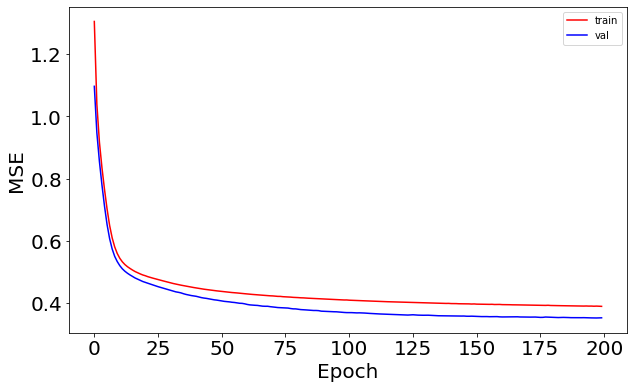

In [38]:
# Graficar el mse
model_history = model_search.fit(X_train,y_train,
                    epochs=epochs,
                    batch_size=200,
                    validation_data=(X_test,y_test))


fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

### Comparación de modelos

In [39]:
data_compar_cross = {'Modelo': ['LR', 'Ridge', 'RF','Tree', ' SVR', 'NN'], 'MSE': [mse_lr, mse_ridge, mse_rf, mse_tree,mse_svr, mse_nn],
                    'MAE':[mae_lr, mae_ridge, mae_rf, mae_tree,mae_svr, mae_nn],
                    'R2':[r2_lr, r2_ridge, r2_rf, r2_tree,r2_svr, r2_nn]} 
data_compar_cross = pd.DataFrame(data_compar_cross)
data_compar_cross

,Modelo,MSE,MAE,R2
0,LR,0.163589,0.311901,0.836411
1,Ridge,0.163572,0.312042,0.836428
2,RF,0.085517,0.208829,0.914483
3,Tree,0.108104,0.223100,0.891896
4,SVR,0.118553,0.257272,0.881447
5,NN,0.110560,0.244393,0.889440


In [40]:
#crear nuevos datos
X_new  = pd.DataFrame([[27, 0, 30, 5999, 7000]], columns=['age', 'gender', 'miles', 'debt', 'income'])
X_new

,age,gender,miles,debt,income
0,27,0,30,5999,7000


In [41]:
# Make new predictions

ynew = new_model_RF.predict(X_new)



/Users/axelcabrerajaramillo/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [42]:
ynew

#Faltaría hacer ingeniería en reversa para revertir el escalemiento


array([1.89150135])

#### Anuncios parroquiales

Exámen próximo viernes 4 de Octubre en horario de clase. 
